# The Case Study

You are working at a technology-oriented company. The Human Resources (HR) department is about to start a
pre-emptive program towards mitigation of mental health issues amongst the company’s staff. HR has contacted
you as one of the company's data scientists to support the program with quantitative analyses. You are provided
with the results of a survey, which has been conducted amongst technology-oriented employees and which is
considered representative for your company as well. The challenge in working with this data set lies in its high
dimensionality and complexity so that it is not straightforward to interpret and transfer the results to the
structures of your organization. Another challenge in working with this data is missing values and nonstandardized textual inputs. HR has asked you to provide a better overview over the data in ways which are more
easily interpretable and transferable to improvements at your workplace. The goal is to categorize participants of
the survey according to their answers and to provide visualizations supporting the interpretation of these clusters.

These visualizations should convey a perspective onto the data set, which is reduced in complexity and
dimensionality and yet preserving the main characteristics of the whole available data. You should also provide
insight into each individual identified cluster of participants and their main characteristics. Ultimately, this will help to identify potential points of leverage for the planned program, which will be addressed with targeted
measures.

# Imports

In [362]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Overview

In [363]:
df = pd.read_csv('/Users/emre/Documents/IU Data Science/2022/3 Machine Learning - Unsupervised Project/archive/mental-heath-in-tech-2016_20161114.csv')

In [364]:
df.head(3)

Are you self-employed?  \
0                       0   
1                       0   
2                       0   

  How many employees does your company or organization have?  \
0                                             26-100           
1                                               6-25           
2                                               6-25           

   Is your employer primarily a tech company/organization?  \
0                                                1.0         
1                                                1.0         
2                                                1.0         

   Is your primary role within your company related to tech/IT?  \
0                                                NaN              
1                                                NaN              
2                                                NaN              

  Does your employer provide mental health benefits as part of healthcare coverage?  \
0                    Not eligible for coverage / N/A                                  
1                                                 No                                  
2                                                 No                                  

  Do you know the options for mental health care available under your employer-provided coverage?  \
0                                                NaN                                                
1                                                Yes                                                
2                                                NaN                                                

  Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?  \
0                                                 No                                                                                       
1                                                Yes                                                                                       
2                                                 No                                                                                       

  Does your employer offer resources to learn more about mental health concerns and options for seeking help?  \
0                                                 No                                                            
1                                                Yes                                                            
2                                                 No                                                            

  Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?  \
0                                       I don't know                                                                                               
1                                                Yes                                                                                               
2                                       I don't know                                                                                               

  If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:  \
0                                          Very easy                                                            
1                                      Somewhat easy                                                            
2                         Neither easy nor difficult                                                            

  Do you think that discussing a mental health disorder with your employer would have negative consequences?  \
0                                                 No                                                           
1                                                 No                     

# Cleaning Data for EDA

After an initial overview of the data, the first hurdle that stands out are the column names which are full questions instead of short and workable column names. In the first steps the columns will be renamed to make further investigaions easier.

**Short Summary of this section**:
- Renaming columns
- Dropping & Imputing missing values
- Adjust column entries & types

## Rename all columns to make further investigation easier

In order to optimize the truncation of the questions here are some abbreviations:
- mh = mental health
- ph = physical health
- neg = negative
- pos = pos
- diag = diagnosed
- prev = previous

In [365]:
columns_new = [
    'self_employed',
    'company_size',
    'tech_comp_flag',
    'tech_role_flag',
    'mh_coverage_flag',
    'mh_coverage_awareness_flag',
    'mh_employer_discussion_flag',
    'mh_resources_provided_flag',
    'mh_anonimity_flag',
    'mh_sick_leave',
    'mh_discussion_neg_impact',
    'ph_discussion_neg_impact',
    'mh_discussion_coworkers',
    'mh_discussion_supervisor',
    'mh_versus_ph_employer',
    'mh_consequence_coworkers',
    'mh_coverage_flag2',
    'mh_online_resources_flag',
    'mh_diagnosed&reveal_clients_flag',
    'mh_diagnosed&reveal_clients_impact',
    'mh_diagnosed&reveal_coworkers_flag',
    'mh_coworkers_reveal_neg_impact',
    'mh_productivity_impact',
    'mh_productivity_impact_percentage',
    'prev_employers_flag',
    'prev_employers_mh_benefits',
    'prev_employers_mh_benefits_awareness',
    'prev_employers_mh_discussion',
    'prev_employers_mh_resources',
    'prev_employers_mh_anonimity',
    'prev_employers_mh_discuss_neg_consequences',
    'prev_employers_ph_discuss_neg_consequences',
    'prev_employers_mh_discussion_cowork',
    'prev_employers_mh_discussion_supervisor',
    'prev_employers_mh_importance_employer',
    'prev_employers_mh_consequences_coworkers',
    'future_employers_ph_specification',
    'why/why_not',
    'future_employers_mh_specification',
    'why/why_not2',
    'mh_hurt_on_career',
    'mh_neg_view_coworkers',
    'mh_sharing_friends/fam_flag',
    'mh_bad_response_workplace',
    'mh_for_others_bad_response_workplace',
    'mh_family_history',
    'mh_disorder_past',
    'mh_disorder_current',
    'yes_what_diag',
    'maybe_whats_your_diag',
    'mh_diag_professional',
    'yes_condition_diag',
    'mh_sought_professional_treatment',
    'mh_effective_treat_impact_on_work',
    'mh_not_effective_treat_impact_on_work',
    'age',
    'gender',
    'country_live',
    'live_us_teritory',
    'country_work',
    'work_us_teritory',
    'work_position',
    'remote_flag'
]

In [366]:
df.columns = columns_new

After changing the column names to more readable and shorter versions, we can easily view the values and types of entries next.

In [367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 63 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   self_employed                               1433 non-null   int64  
 1   company_size                                1146 non-null   object 
 2   tech_comp_flag                              1146 non-null   float64
 3   tech_role_flag                              263 non-null    float64
 4   mh_coverage_flag                            1146 non-null   object 
 5   mh_coverage_awareness_flag                  1013 non-null   object 
 6   mh_employer_discussion_flag                 1146 non-null   object 
 7   mh_resources_provided_flag                  1146 non-null   object 
 8   mh_anonimity_flag                           1146 non-null   object 
 9   mh_sick_leave                               1146 non-null   object 
 10  mh_discussio

There are two things that immediately stand out:
1. The data type can be improved by adjusting objects, integers, and floats accordingly, and
2. there are a lot of missing values in this dataset

Let's get a visual on the missing values first.

## Dealing with missing values (NaN)

Short summary of this section:
- Overview missing values
- Clean data from self-employed survey-takers & columns for self-employed survey takers
- Impute `tech_role_flag` with `work_position`
- Dropping columns with more than 50% of NaN values
- Impute all remaining NaN values with mode per column

### Overview missing values

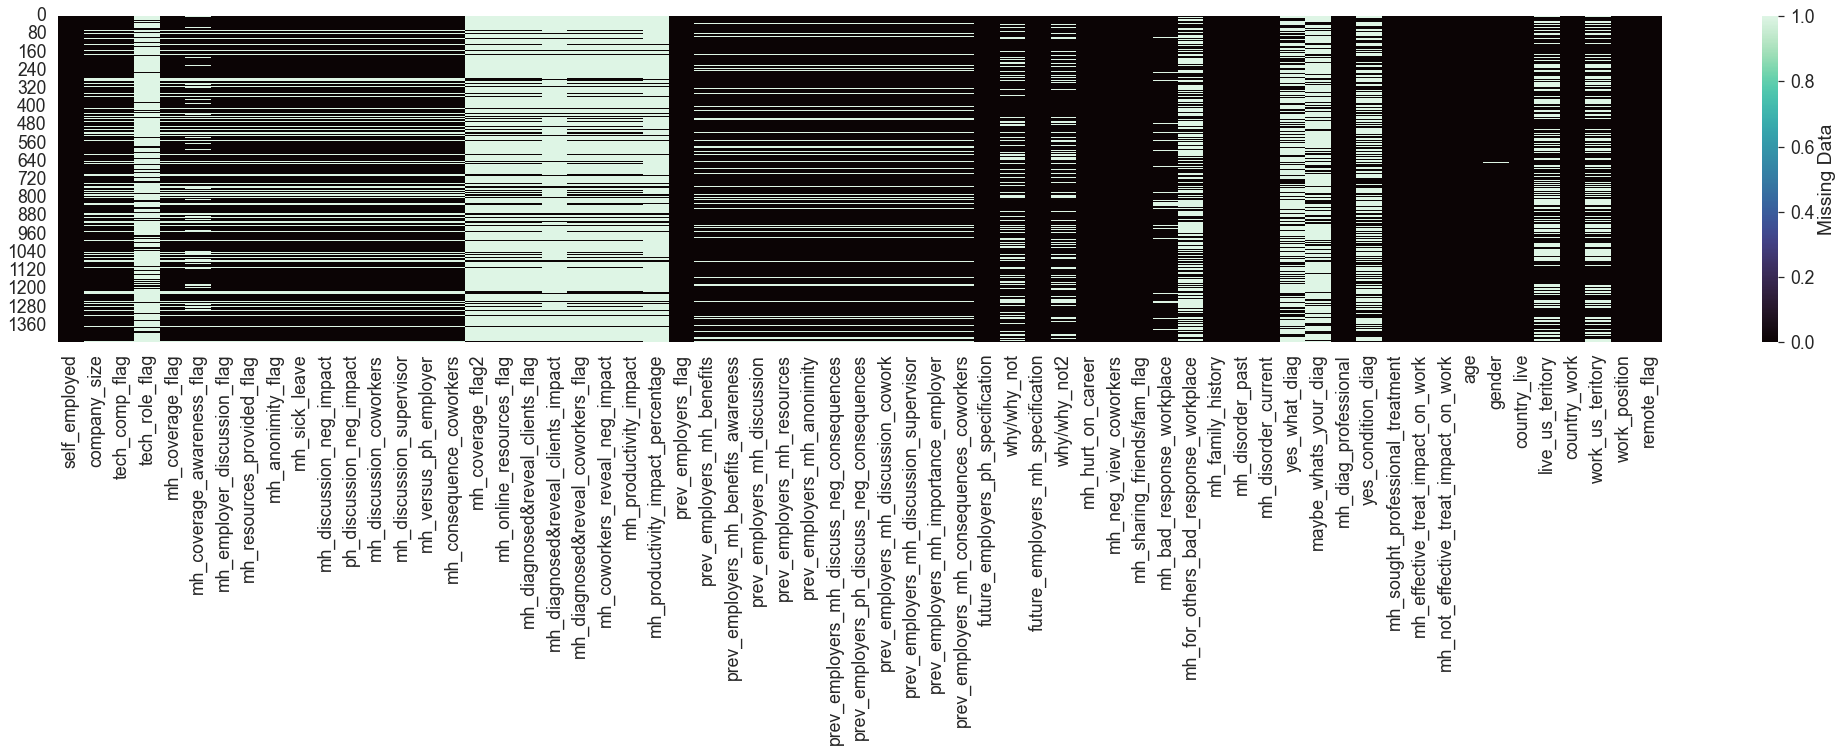

In [368]:
sns.set(font_scale=1.6)
plt.figure(figsize=(32,6))
sns.heatmap(df.isna(),
            cmap='mako',
            cbar_kws={'label': 'Missing Data'})
plt.show()

# Saving the graph as png for later use
# plt.savefig("Missing_values_as_heatmap.png", dpi=300, format="png")

This graphic shows clearly that a lot of data is missing especially in the section after the second mental health coverage question comes up. It is going to be important to figure out why this section in particular wasn't answered by participants.
One of the striking features of this survey is that the question of mental health healthcare coverge appears twice. The visualization also shows that there is a inverted relationship between answering the first part (`company_size` to `mh_consequence_coworkers`) compared to the second part (`mh_coverage_flag2` to `mh_productivity_impact_percentage`) of healthcare questions.

Our HR is only interested in employees. That's why we can drop all self-employed survey takers.

### Clean data from self-employed survey-takers & columns for self-employed survey takers

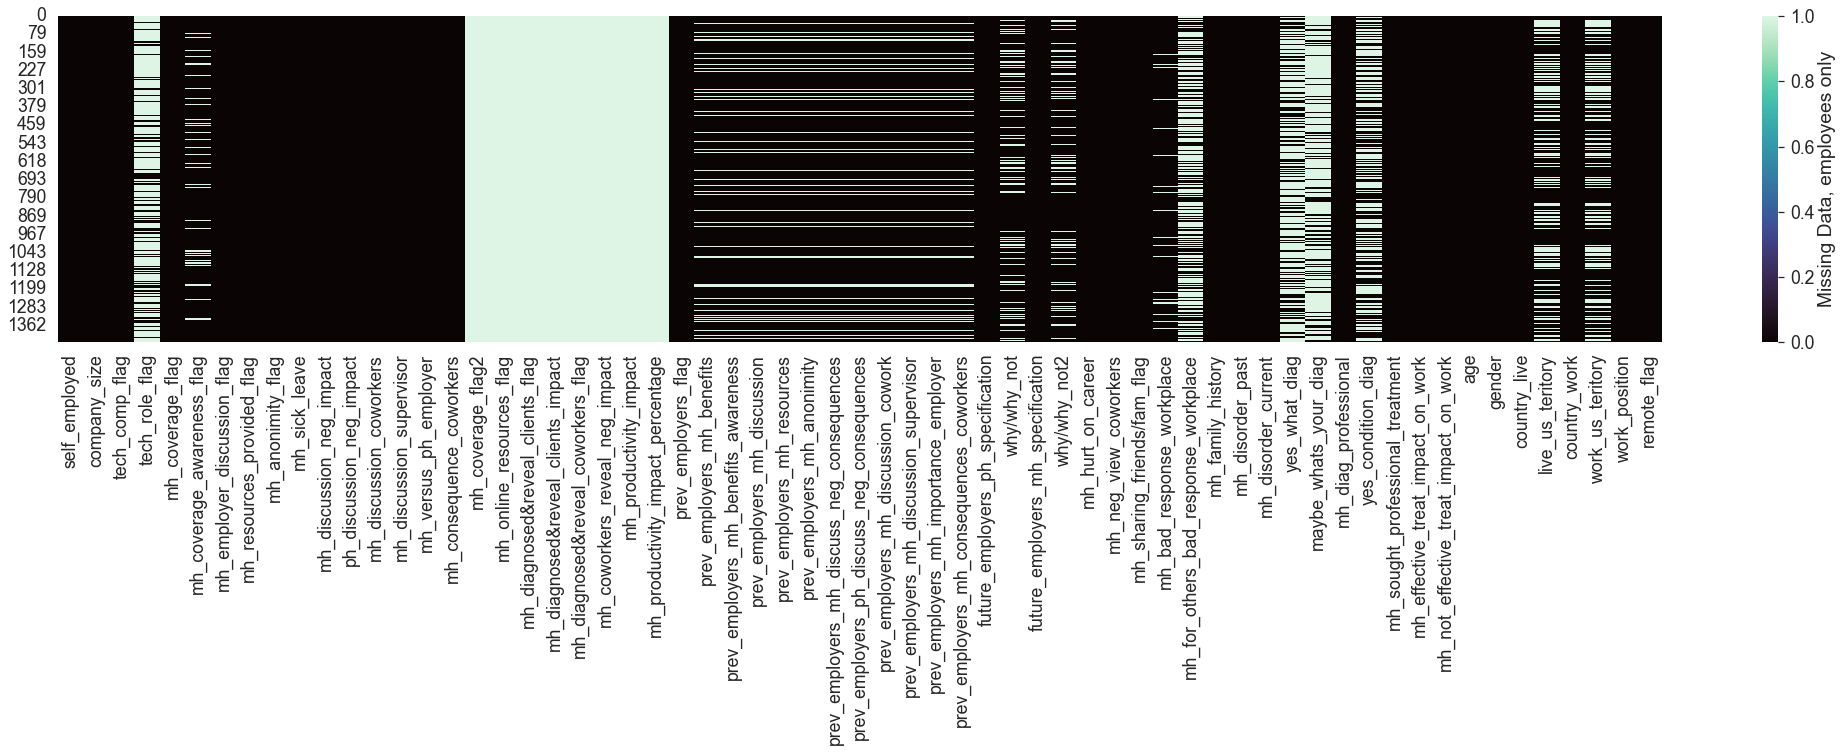

In [369]:
# Count all employees survey takers(survey takers who are employed answered with 0 in the survey)
mask_employed = df.self_employed == 0

plt.figure(figsize=(32,6))
sns.heatmap(df[mask_employed].isna(),
            cmap='mako',
            cbar_kws={'label': 'Missing Data, employees only'})
plt.show()
# plt.savefig("Missing_values_employed.png", dpi=300, format="png")

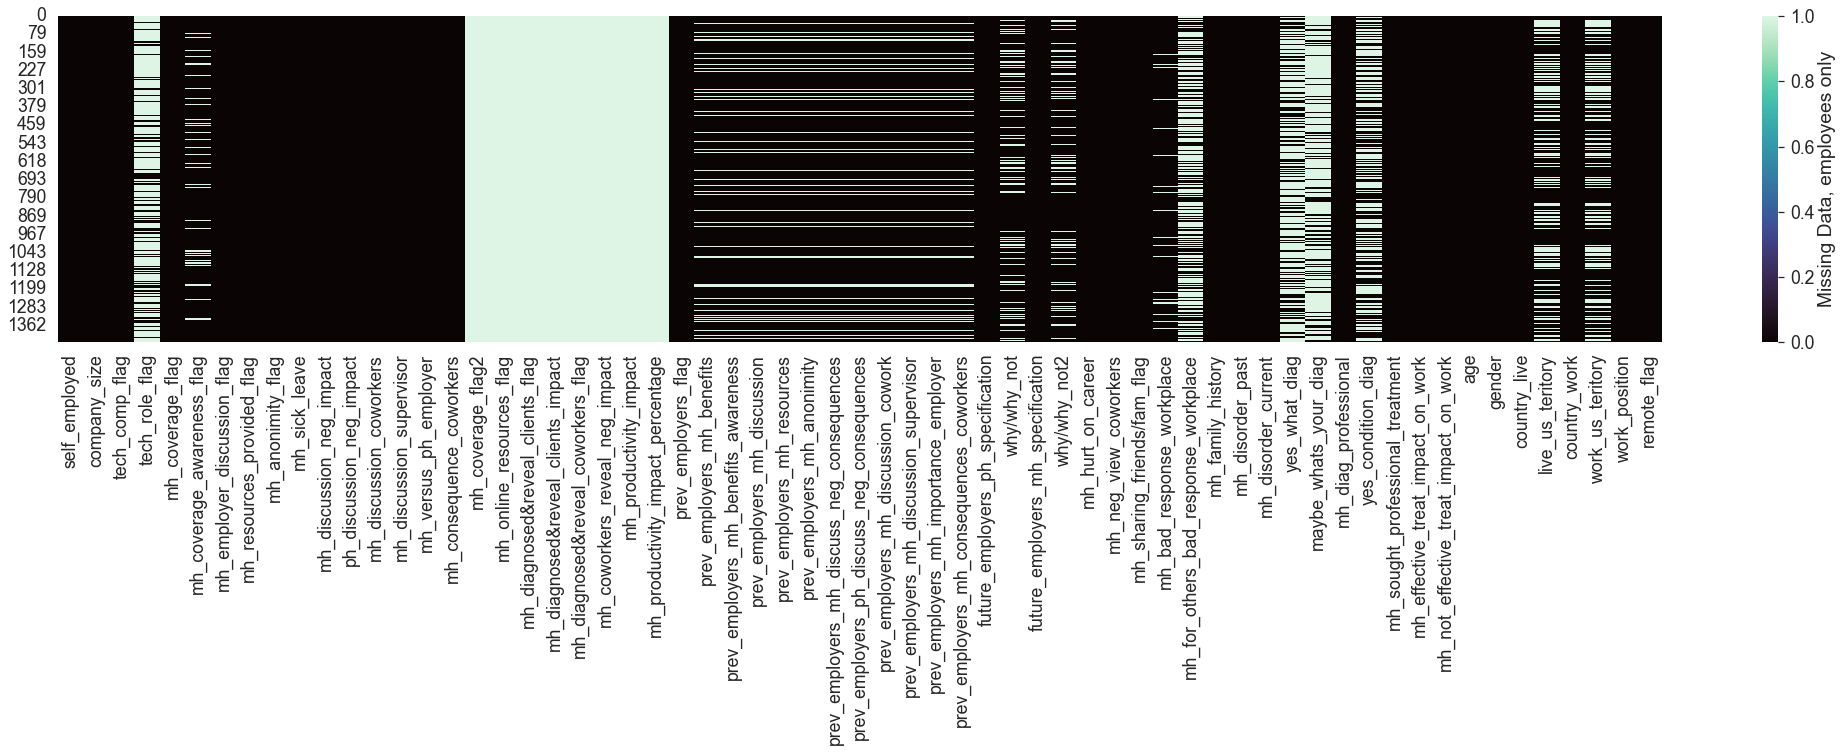

In [370]:
plt.figure(figsize=(32,6))
sns.heatmap(df[mask_employed].isna(),
            cmap='mako',
            cbar_kws={'label': 'Missing Data, employees only'})
plt.show()
# plt.savefig("Missing_values_employed.png", dpi=300, format="png")

Because our company wants to analyze the mental health of other tech companies, all self-employed survey takers and the section `mh_coverage_flag2` to `mh_productivity_impact_percentage` can be dropped.

In [371]:
# Drop all rows having self-employed survey takers
df.drop(df[df.self_employed == 1].index, inplace=True)

# Drop the column `self_employed`
df.drop('self_employed',axis=1,inplace=True)

# Drop all columns referencing answer by only self-employed survey takers
df.drop(df.loc[:,'mh_coverage_flag2':'mh_productivity_impact_percentage'],axis=1,inplace=True)

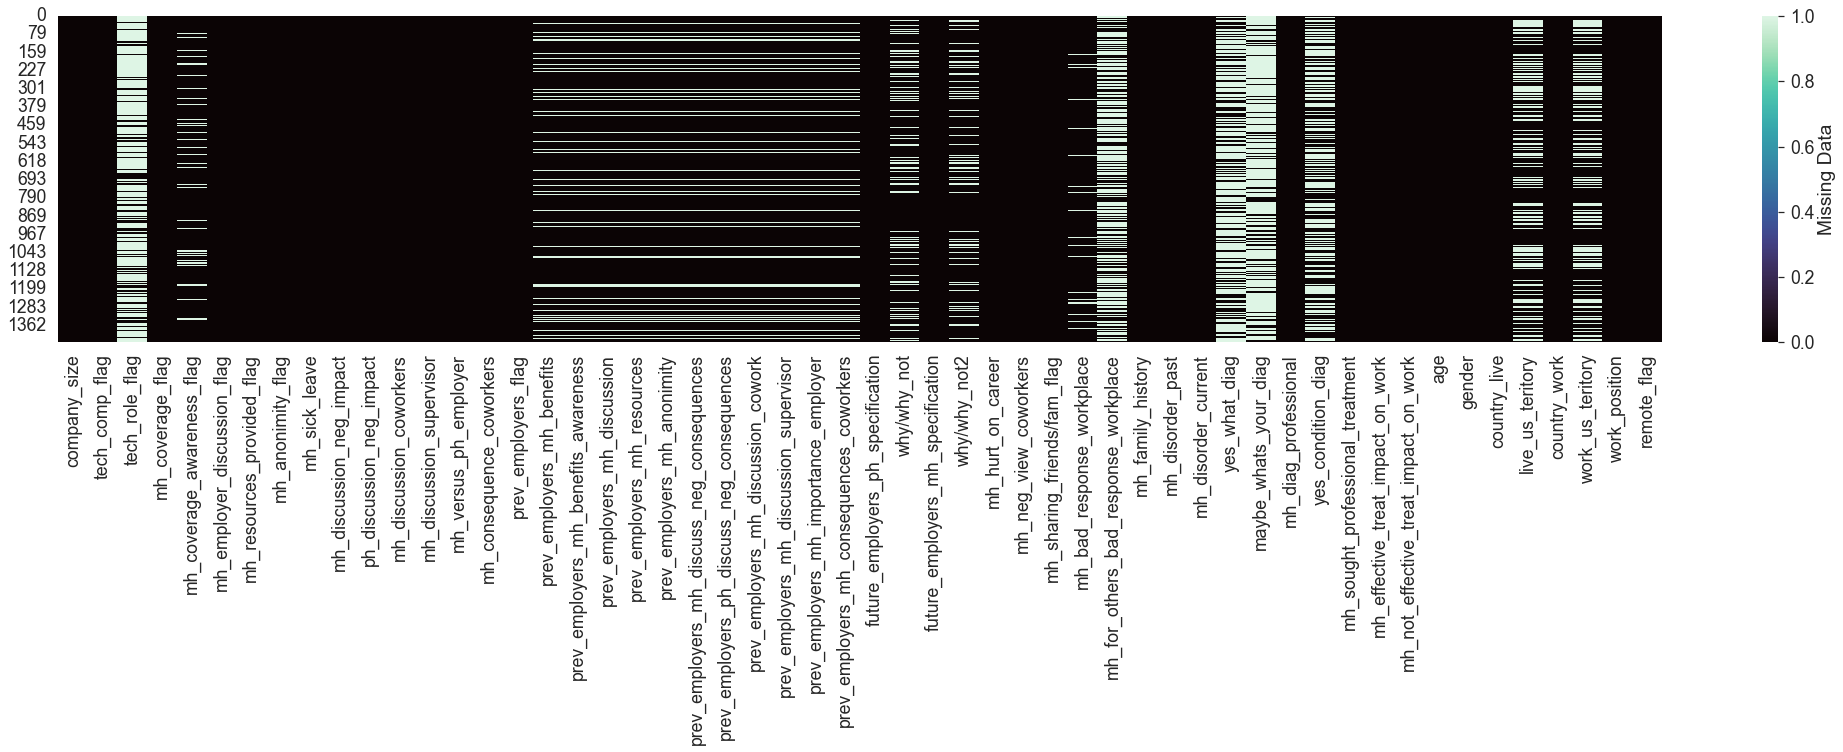

In [372]:
sns.set(font_scale=1.6)
plt.figure(figsize=(32,6))
sns.heatmap(df.isna(),
            cmap='mako',
            cbar_kws={'label': 'Missing Data'})
plt.show()
# plt.savefig("Missing_values_cleaned_from_self-employed.png", dpi=300, format="png")

In [373]:
df.shape

(1146, 54)

The dataframe has been reduced to 1146 rows and 54 columns (originally 1433 rows & 64 columns)

### Dropping columns with more than 50% of NaN values.

The remaining columns with more than 50% of missing values will not be useful and cannot be imputed in a effective manner. Dropping following columns:

- `why/why_not`
- `why/why_not2`
- `mh_sought_professional_treatment`
- `mh_for_others_bad_response_workplace`
- `yes_what_diag`
- `maybe_whats_your_diag`
- `yes_condition_diag`
- `live_us_teritory`
- `work_us_teritory`

In [374]:
df.drop(['why/why_not','why/why_not2','mh_sought_professional_treatment',
         'yes_what_diag','maybe_whats_your_diag','live_us_teritory','work_us_teritory', 'mh_for_others_bad_response_workplace',
         'yes_condition_diag'], axis=1,inplace=True)

### Impute `tech_role_flag` based on `work_position`
The column `tech_role_flag` was omitted by the majority of survey takers whereas `work_position` wasn't. Based on the latter column, we can impute the former column. This is possible bc `work_position` has zero NaN values.

In [375]:
df.work_position.value_counts().nlargest(15)

Back-end Developer                                             238
Front-end Developer                                            116
Other                                                           99
Supervisor/Team Lead                                            60
Back-end Developer|Front-end Developer                          58
DevOps/SysAdmin                                                 48
Front-end Developer|Back-end Developer                          33
Support                                                         32
Executive Leadership                                            30
Dev Evangelist/Advocate                                         27
Designer                                                        18
Front-end Developer|Designer                                    17
Supervisor/Team Lead|Back-end Developer                         17
Back-end Developer|DevOps/SysAdmin                              16
Supervisor/Team Lead|Back-end Developer|Front-end Developer   

In [376]:
# Create mask to check for all `work_position` which contain a tech-role
mask_tech_role_flag = df.work_position.str.contains('Back-end|Front-end|DevOps|SysAdmin|Developer')

In [377]:
# Replace tech roles with "Yes" and non-tech-roles with "No"
df.loc[mask_tech_role_flag] = df.loc[mask_tech_role_flag].fillna("Yes")
df.loc[mask_tech_role_flag != True] = df.loc[mask_tech_role_flag != True].fillna("No")

# Replace 1/0 values with ("Yes"/"No")
df.tech_role_flag.replace({1:"Yes",0:"No"},inplace=True)

In [378]:
df.tech_role_flag.value_counts()

Yes    892
No     254
Name: tech_role_flag, dtype: int64

### Impute remaining NaN with most frequent values per column (mode) 

In [379]:
# Create list with all imputable columns
col_w_nan = df.columns[df.isna().any()].tolist()

# Loop over imputable columns and replace NaN values with most frequent values (Mode)
for n in col_w_nan:
    df[n] = df[n].fillna(df[n].mode()[0])

<Figure size 1152x1152 with 0 Axes>

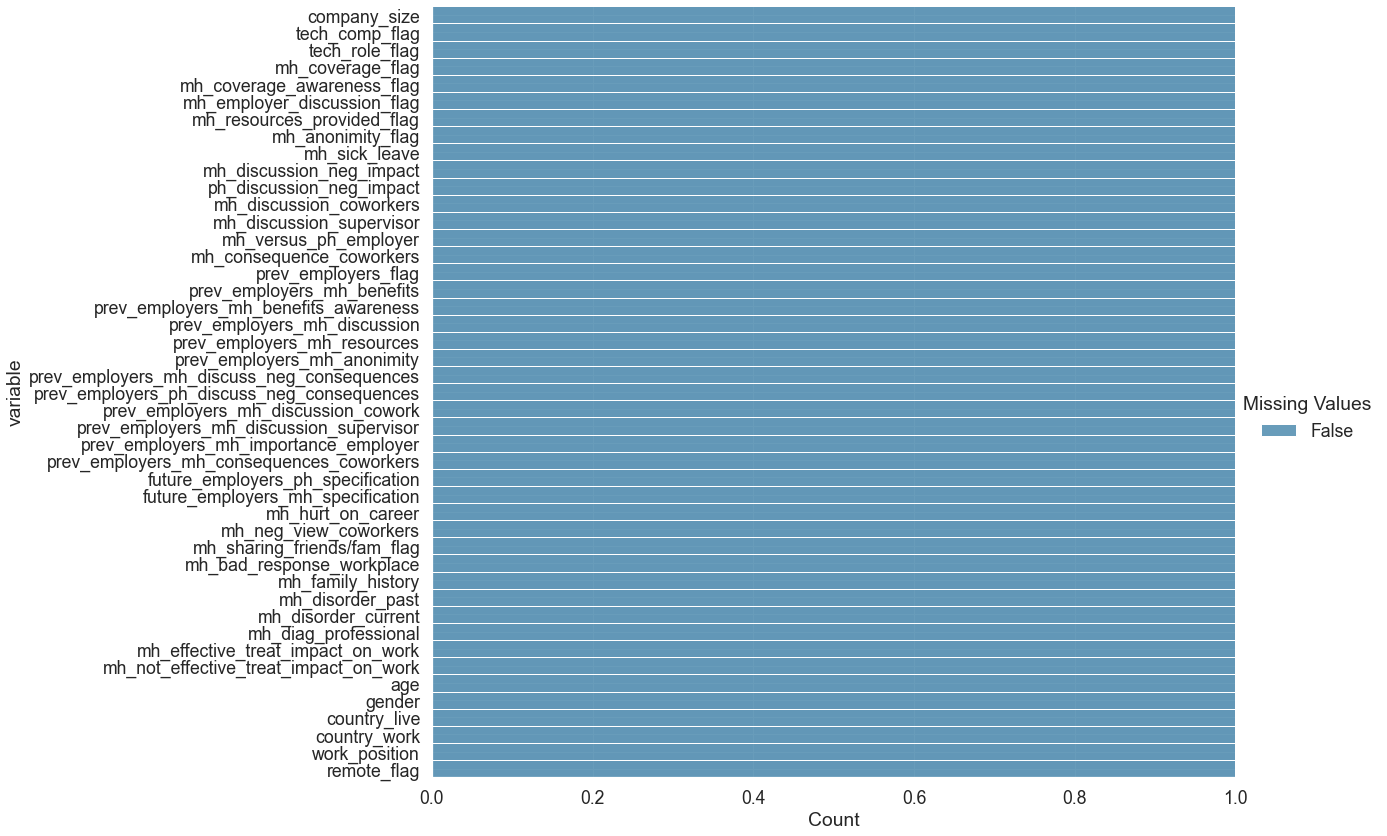

In [380]:
plt.figure(figsize=(16,16))
ax1 = sns.displot(
        data=df.isna().melt(value_name="missing"),
        y="variable",
        hue="missing",
        multiple="fill",
        aspect=1.5,
        height=12,
        palette="mako",
)

ax1._legend.set_title("Missing Values")
plt.show()

There are no more NaN values in the dataframe!

## Adjust column entries & types
Short summary of this section:
- Standartize `gender` spectrum
- Remove outliers in `age`
- Drop all STs coming from countries with less than 20 entries
- Rename “United States of America” and “United Kingdom” to “USA” & “UK”
- Change “More than 1000” to “>1000” in the `company_size` column
- Standardize all “Yes”/”No” answers
    - Some questions had “Yes”/“No” answers, while others had 1/0 values. I have standardized them to the former for the upcoming EDA
- Change the dtype of columns from object to categorical data to save some storage and format upcoming visualizations automatically
- Add a `leadership_column` for EDA
    - In `work_position,` some STs stated that they had leadership responsibility. I’ve added a column to save this fact.

In [381]:
# create dictionary and loop over all columns to add the value_counts into dict
number_of_answers_dict = {}
for n in df.columns:
    number_of_answers_dict[n] = len(df[n].value_counts())

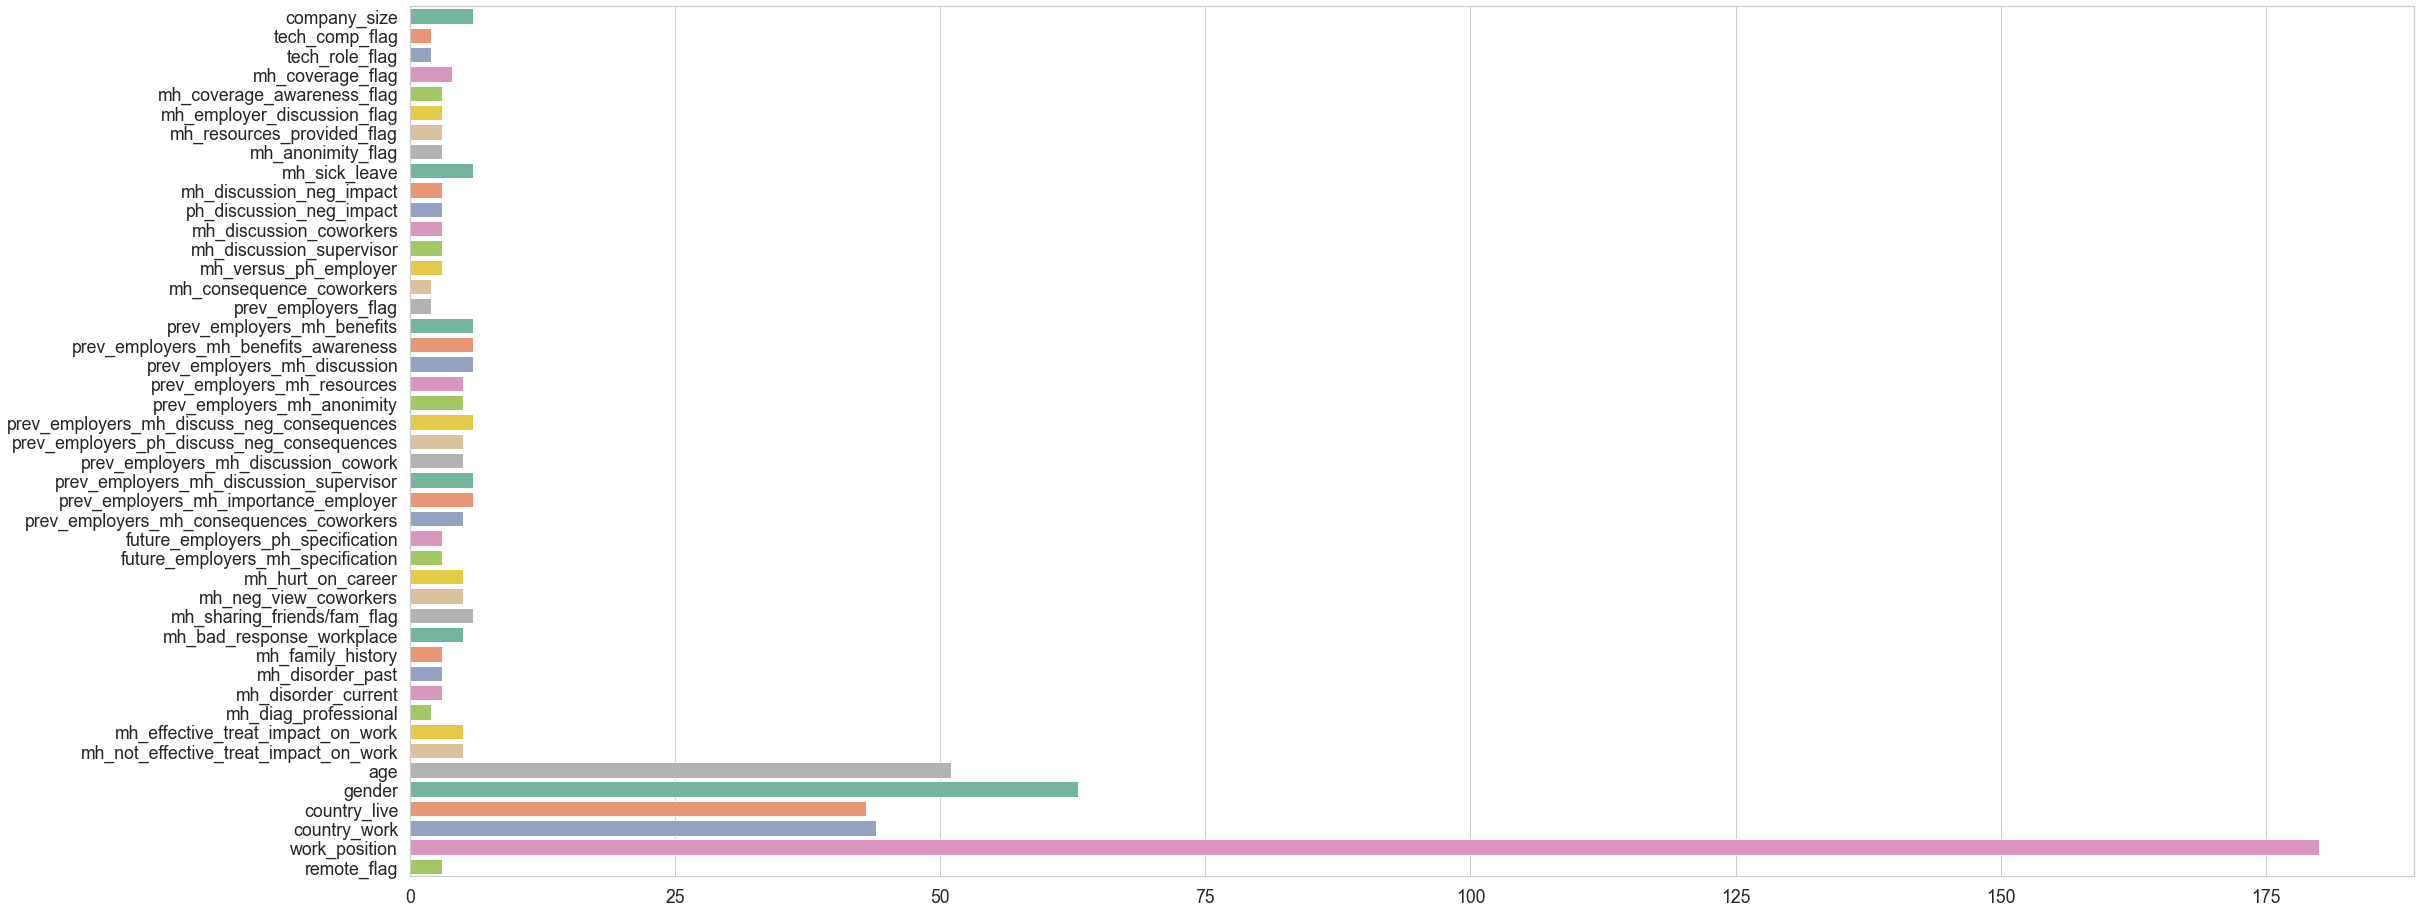

In [382]:
# Plot dictionary to see number of answers per column
plt.figure(figsize=(32,16))
sns.set_style("whitegrid")
keys = list(number_of_answers_dict.keys())
vals = list(number_of_answers_dict.values())
sns.barplot(x=vals, y=keys, palette="Set2")
plt.show()

#### Standartize gender spectrum
There are 63 genders given in the `gender` column which needs unification.

In [383]:
len(df.gender.value_counts())

63

In [384]:
# Create lists for 3 categories "male", "female", "other"
male = ['Male', 'male', 'Male ', 'M', 'm','man', 'Cis male', 'Male.', 'male 9:1 female, roughly', 'Male (cis)',
        'Man', 'Sex is male','cis male', 'Malr', 'Dude', 
        "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
        'mail', 'M|', 'Male/genderqueer', 'male ', 'Cis Male', 'Male (trans, FtM)', 'cisdude', 'cis man', 'MALE']

female = ['Female', 'female', 'I identify as female.', 'female ','Female assigned at birth ', 'F', 'Woman',
          'fm', 'f', 'Cis female ', 'Transitioned, M2F', 'Genderfluid (born female)', 
          'Female or Multi-Gender Femme', 'Female ', 'woman', 'female/woman','Cisgender Female', 'fem', 
          'Female (props for making this a freeform field, though)',' Female', 'Cis-woman', 
          'female-bodied; no feelings about gender','AFAB']

other = ['Bigender', 'non-binary', 'Other/Transfeminine', 'Androgynous', 'Other', 'nb masculine',
         'none of your business', 'genderqueer', 'Human', 'Genderfluid','Enby', 'genderqueer woman', 'mtf',
         'Queer', 'Agender', 'Fluid','Nonbinary', 'human', 'Unicorn', 'Genderqueer','Genderflux demi-girl',
         'Transgender woman','Yes','No']

# Replace all sex in columns with one of the 3 sex categories
df["gender"].replace(to_replace=male, value='male', inplace=True)
df["gender"].replace(to_replace=female, value='female',inplace=True)
df["gender"].replace(to_replace=other, value='other',inplace=True)

#### Handle age outliers
The age column has some huge outliers shown by following graph:

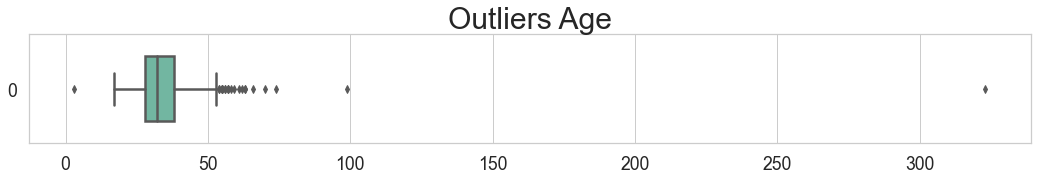

In [385]:
plt.figure(figsize=(16,2))
sns.set_style("whitegrid")
ax = sns.boxplot(data=df.age, palette='Set2',orient='h',linewidth=2.5,width=.6 )
ax.set_title('Outliers Age', fontsize=30)
plt.show()

There are just two outliers in this column, however for future reference, all ages smaller than 14 and bigger than 120 will be replaced by the average age.

In [386]:
# Calculate the average age
median_age = df.age.median()

# Apply funciton which iterates over every entry in the age column and replaces all values
# which are bigger than 120 and smaller than 14.
df.age = df.age.apply(lambda x: median_age if x>=120 or x<=14 else x)

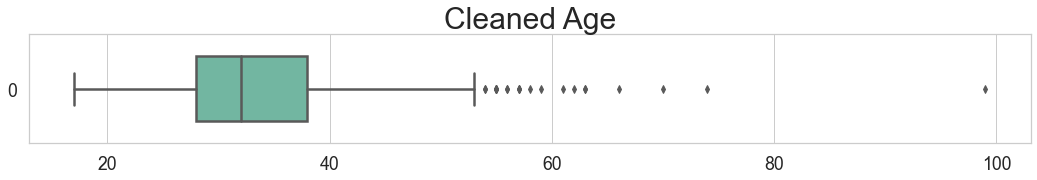

In [387]:
plt.figure(figsize=(16,2))
sns.set_style("whitegrid")
ax = sns.boxplot(data=df.age, palette='Set2',orient='h',linewidth=2.5,width=.6 )
ax.set_title('Cleaned Age', fontsize=30)
plt.show()

No more outliers in `age` column.

## Other adjustments

#### Drop all countries in which the count is smaller than 20

In [388]:
# Drop all values country_work < 20
mask_country_work = df.country_work.isin(["United States of America", "United Kingdom", "Canada", "Germany", "Netherlands","Australia"])
df.drop(df[mask_country_work == False].index, inplace=True)

# Drop all values country_live < 20
mask_country_live = df.country_live.isin(["United States of America", "United Kingdom","Canada", "Germany", "Netherlands","Australia"])
df.drop(df[mask_country_live == False].index, inplace=True)

#### Rename countries

In [389]:
# Renaming of United States of America and United Kingdom for readability in visualizations later
df.country_work.replace({"United States of America":"USA", "United Kingdom": "UK"}, inplace=True)
df.country_live.replace({"United States of America":"USA", "United Kingdom": "UK"}, inplace=True)

#### Change `company size`'s last segment

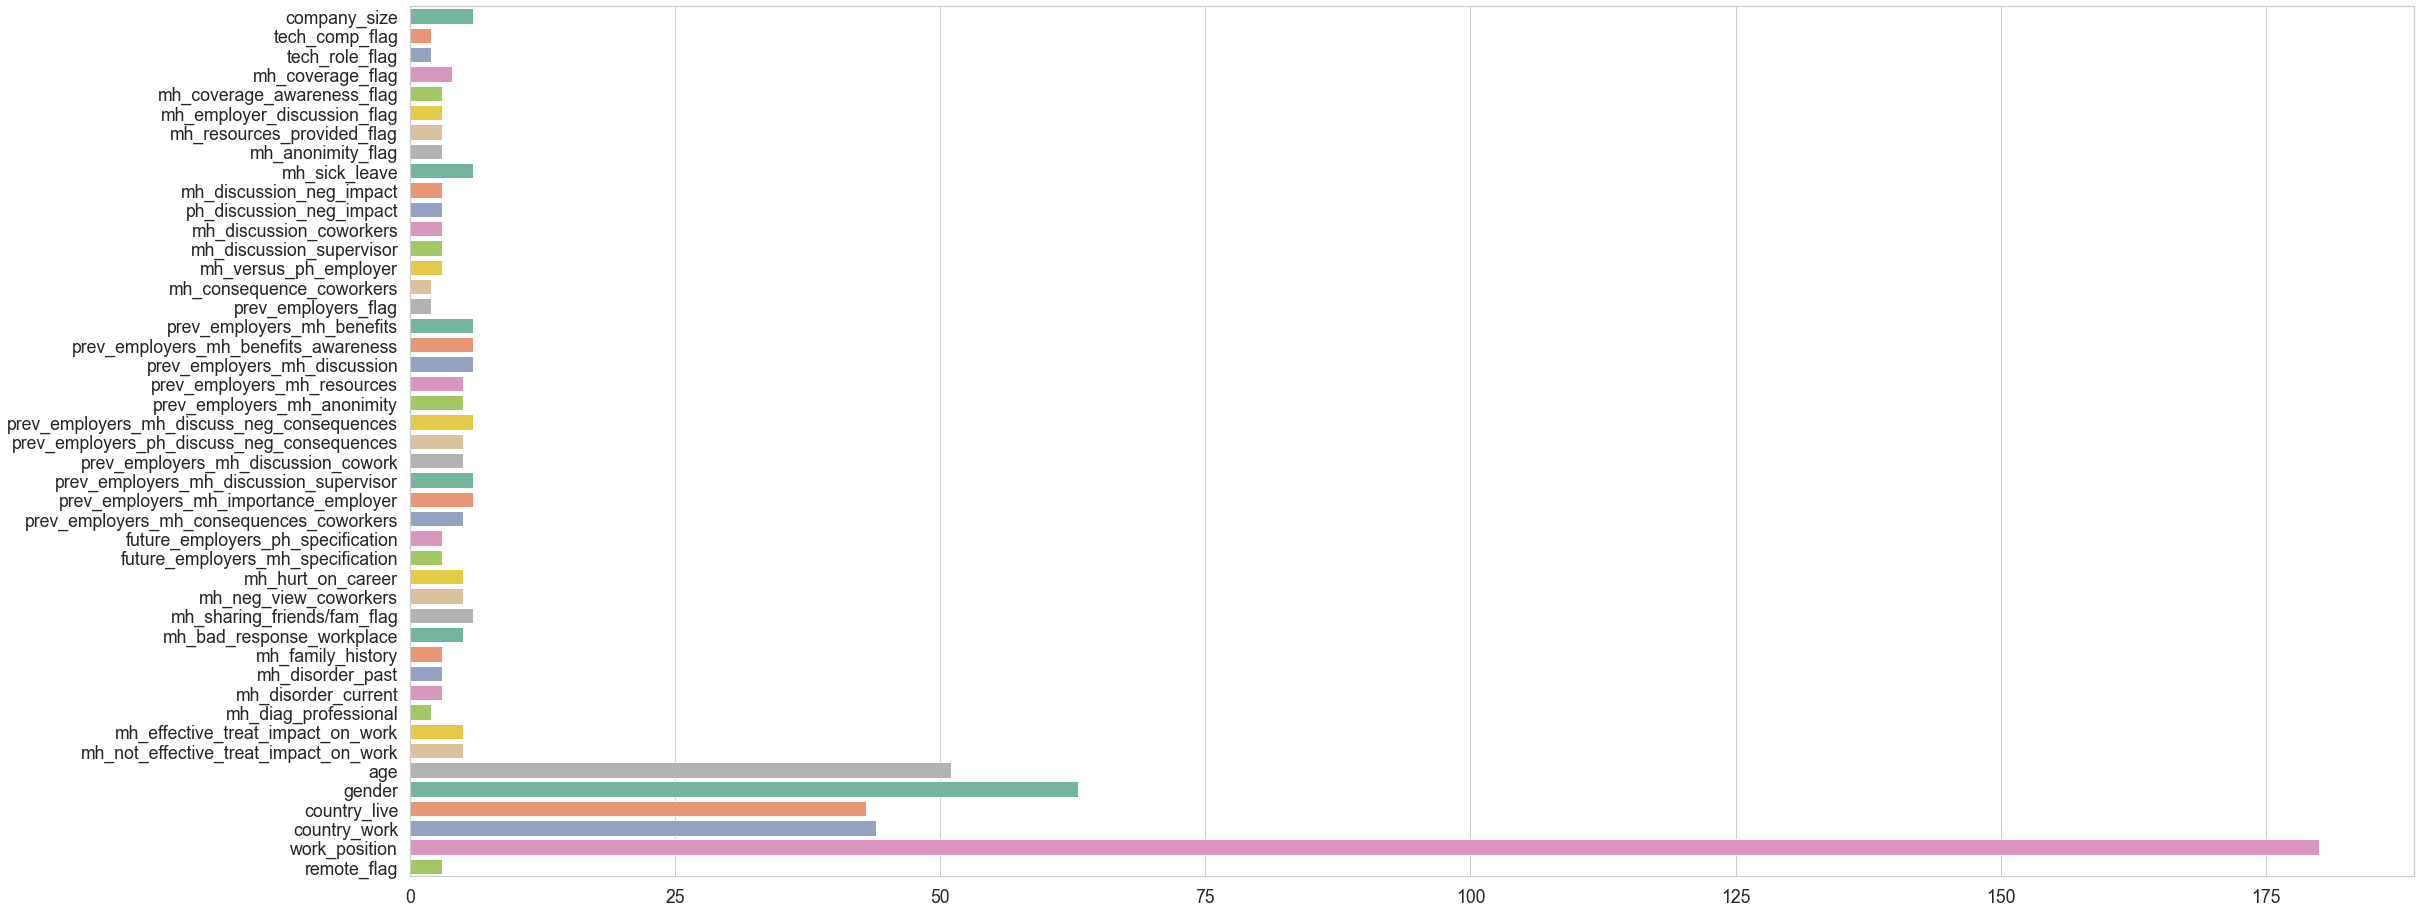

In [390]:
plt.figure(figsize=(32,16))
sns.color_palette("Set2")
keys = list(number_of_answers_dict.keys())
vals = list(number_of_answers_dict.values())
sns.barplot(x=vals, y=keys,palette="Set2")
plt.show()
# plt.savefig("Number_of_answers_per_column.png", dpi=300, format="png")

In [391]:
df.company_size.value_counts()

26-100            263
More than 1000    232
100-500           213
6-25              181
500-1000           68
1-5                49
Name: company_size, dtype: int64

In [392]:
df.company_size.replace(to_replace='More than 1000', value='>1000', inplace=True)

#### Standartizing Yes/NO answers
There are some columns that answer Yes and No Questions with 1/0 or Yes/No. Let's standartize the answer

In [393]:
df.head(3)

company_size  tech_comp_flag tech_role_flag  \
0       26-100             1.0            Yes   
1         6-25             1.0            Yes   
2         6-25             1.0            Yes   

                  mh_coverage_flag mh_coverage_awareness_flag  \
0  Not eligible for coverage / N/A                        Yes   
1                               No                        Yes   
2                               No                        Yes   

  mh_employer_discussion_flag mh_resources_provided_flag mh_anonimity_flag  \
0                          No                         No      I don't know   
1                         Yes                        Yes               Yes   
2                          No                         No      I don't know   

                mh_sick_leave mh_discussion_neg_impact  \
0                   Very easy                       No   
1               Somewhat easy                       No   
2  Neither easy nor difficult                    Maybe   

  ph_discussion_neg_impact mh_discussion_coworkers mh_discussion_supervisor  \
0                       No                   Maybe                      Yes   
1                       No                   Maybe                      Yes   
2                       No                   Maybe                    Maybe   

  mh_versus_ph_employer mh_consequence_coworkers  prev_employers_flag  \
0          I don't know                       No                    1   
1                   Yes                       No                    1   
2          I don't know                       No                    1   

  prev_employers_mh_benefits prev_employers_mh_benefits_awareness  \
0               No, none did            N/A (not currently aware)   
1          Yes, they all did                  I was aware of some   
2               No, none did            N/A (not currently aware)   

  prev_employers_mh_discussion prev_employers_mh_resources  \
0                 I don't know                    None did   
1                     None did                    Some did   
2                     None did                    Some did   

  prev_employers_mh_anonimity prev_employers_mh_discuss_neg_consequences  \
0                I don't know                               Some of them   
1                 Yes, always                               None of them   
2                I don't know                               I don't know   

  prev_employers_ph_discuss_neg_consequences  \
0                               None of them   
1                               None of them   
2                               Some of them   

    prev_employers_mh_discussion_cowork  \
0         Some of my previous employers   
1  No, at none of my previous employers   
2         Some of my previous employers   

  prev_employers_mh_discussion_supervisor  \
0           Some of my previous employers   
1           Some of my previous employers   
2                            I don't know   

  prev_employers_mh_importance_employer  \
0                          I don't know   
1                              Some did   
2                          I don't know   

  prev_employers_mh_consequences_coworkers future_employers_ph_specification  \
0                             None of them                             Maybe   
1                             None of them                             Maybe   
2                             Some of them                               Yes   

  future_employers_mh_specification           mh_hurt_on_career  \
0                             Maybe                       Maybe   
1                                No  No, I don't think it would   
2                               Yes                       Maybe   

          mh_neg_view_coworkers mh_sharing_friends/fam_flag  \
0  No, I don't think they would               Somewhat open   
1  No, I don't think they would               Somewhat open   
2                         Maybe               Somewhat ope

In [394]:
df.tech_comp_flag = df.tech_comp_flag.replace({0:"No", 1:"Yes"})
df.prev_employers_flag = df.prev_employers_flag.replace({0:"No", 1:"Yes"})

#### Change dtype's of columns

In [395]:
list_category = []
list_numeric = []

for n in df.columns:
    if n == "age" or n =="work_position":
        pass
    else:
        df[n] = df[n].astype("category")

In [396]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1006 entries, 0 to 1432
Data columns (total 45 columns):
 #   Column                                      Non-Null Count  Dtype   
---  ------                                      --------------  -----   
 0   company_size                                1006 non-null   category
 1   tech_comp_flag                              1006 non-null   category
 2   tech_role_flag                              1006 non-null   category
 3   mh_coverage_flag                            1006 non-null   category
 4   mh_coverage_awareness_flag                  1006 non-null   category
 5   mh_employer_discussion_flag                 1006 non-null   category
 6   mh_resources_provided_flag                  1006 non-null   category
 7   mh_anonimity_flag                           1006 non-null   category
 8   mh_sick_leave                               1006 non-null   category
 9   mh_discussion_neg_impact                    1006 non-null   category
 10  

One of the benefits of dtype = "category" is the reduced storage which can be beneficial if more data is collected.

#### Add `leadership_flag` column

In [397]:
mask_leadership = df.work_position.str.contains('Supervisor|Team Lead|Lead|Leadership|Executive|Executive Leadership')
df["leadership_position"] = mask_leadership

In [398]:
df.leadership_position.replace({False:"No", True:"Yes"},inplace=True)

# Exploratory Data Analysis
Let's get a overview of the data

## Number of tech roles per company size and per gender

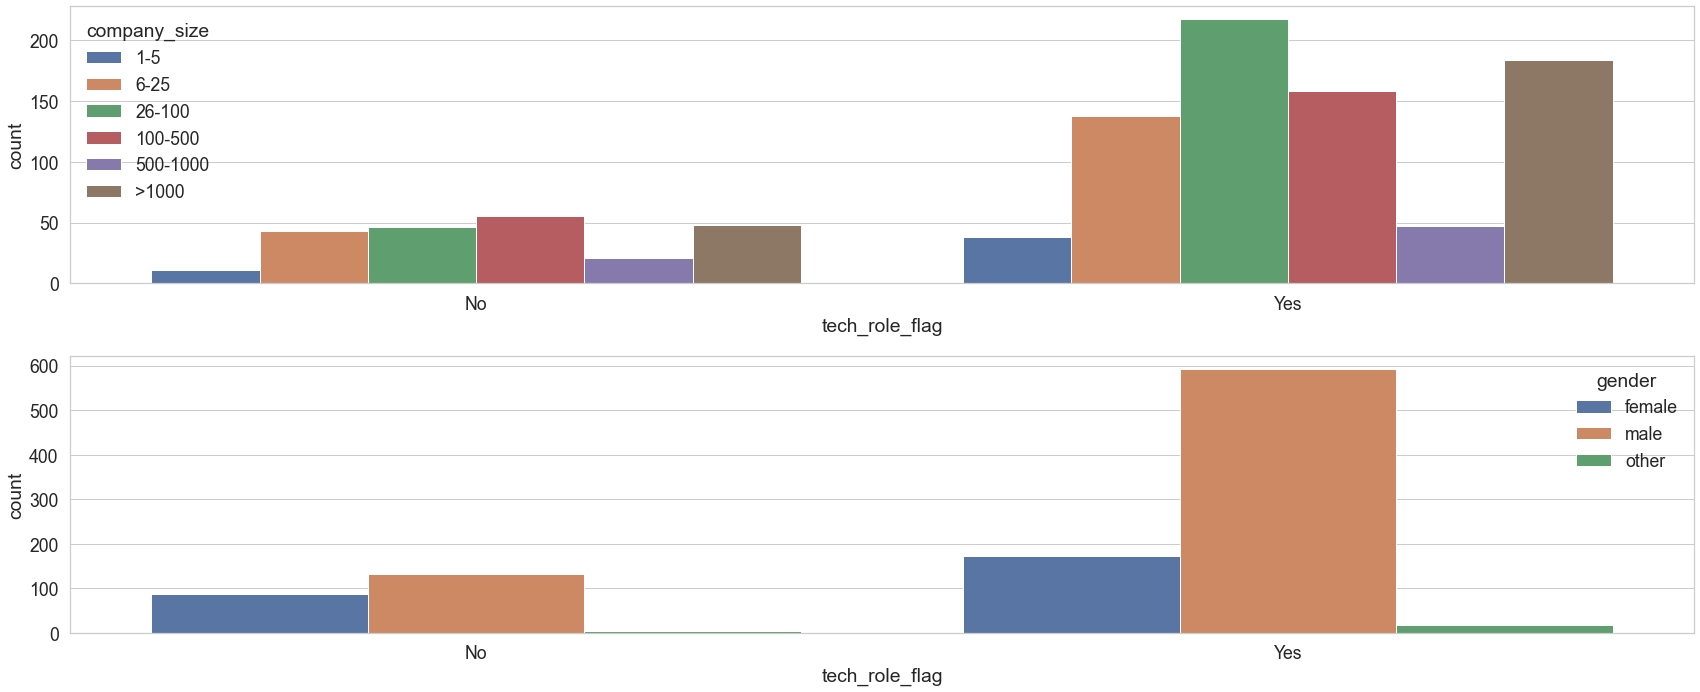

In [399]:
fig, (ax1,ax2) = plt.subplots(2, figsize = (24,10))
hue_order = ["1-5","6-25","26-100","100-500","500-1000", ">1000"]

sns.countplot(ax=ax1, data=df,x="tech_role_flag",hue="company_size",hue_order=hue_order)
sns.countplot(ax=ax2, data=df,x="tech_role_flag",hue="gender")

fig.tight_layout()
plt.show()

## Mental Disorder currently vs in the past

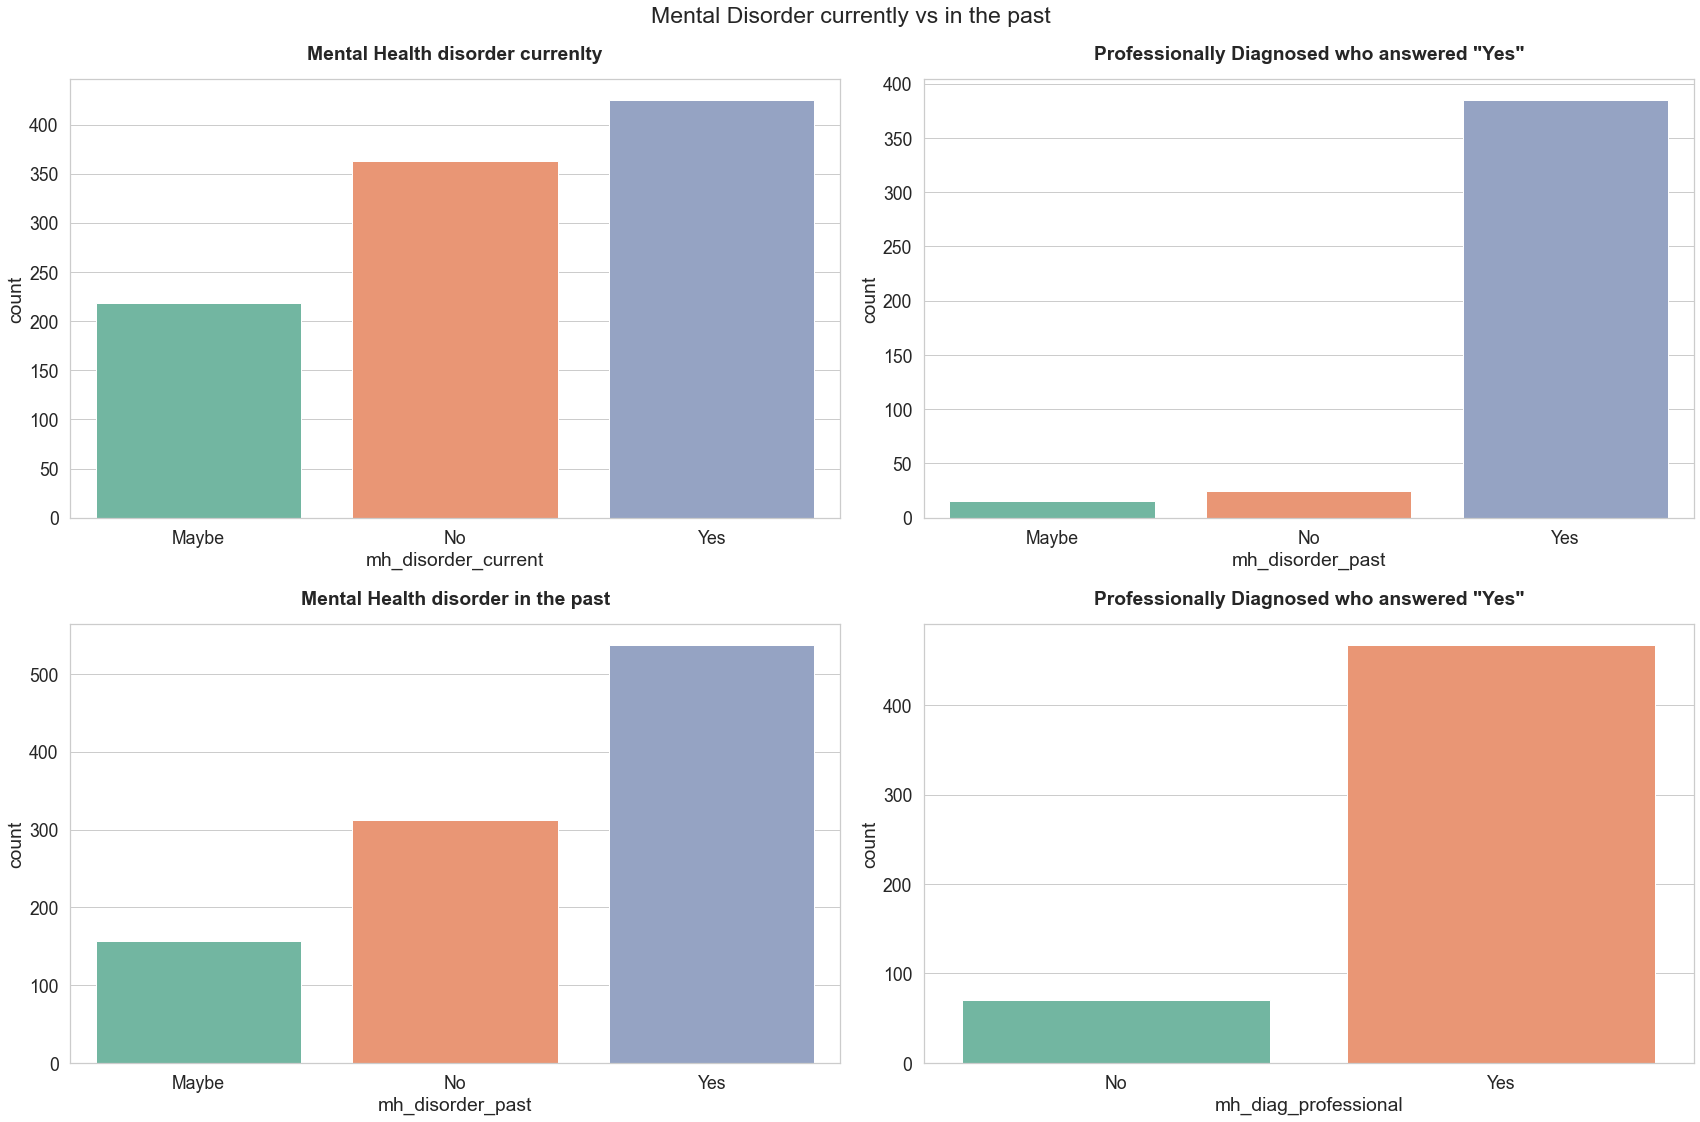

In [400]:
fig, ax = plt.subplots(2,2, figsize=(24,16))
fig.suptitle('Mental Disorder currently vs in the past')
ax[0,0].set_title('Mental Health disorder currenlty',pad=20,fontweight="bold")
ax[0,1].set_title('Professionally Diagnosed who answered "Yes"',pad=20,fontweight="bold")
ax[1,0].set_title('Mental Health disorder in the past',pad=20,fontweight="bold")
ax[1,1].set_title('Professionally Diagnosed who answered "Yes"',pad=20,fontweight="bold")

sns.set_style('whitegrid')
sns.set_palette('Set2')

sns.countplot(ax=ax[0,0], data=df, x="mh_disorder_current")
sns.countplot(ax=ax[0,1], data=df[df.mh_disorder_current == "Yes"], x="mh_disorder_past")
sns.countplot(ax=ax[1,0], data=df, x="mh_disorder_past")
sns.countplot(ax=ax[1,1], data=df[df.mh_disorder_past == "Yes"], x="mh_diag_professional")


fig.tight_layout()
plt.show()

## Mental health discussion with coworker vs supervisor

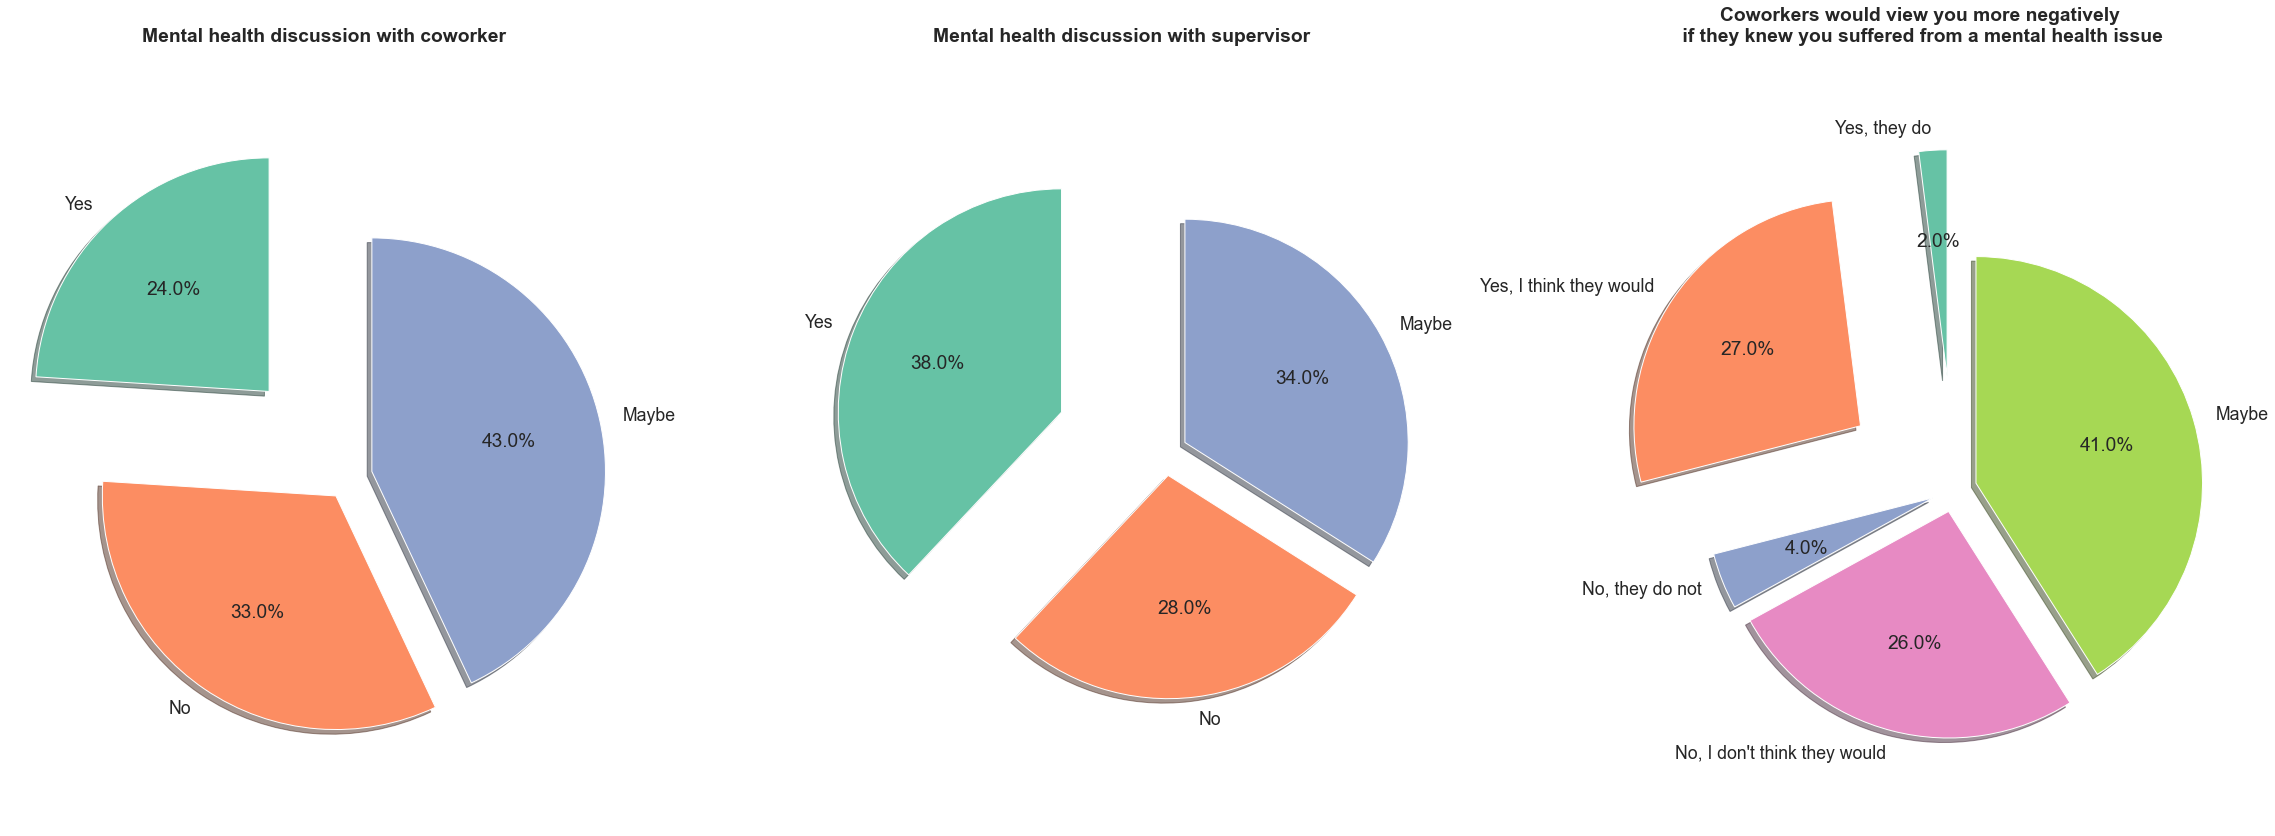

In [401]:
fig, ax = plt.subplots(1,3,figsize=(32,12))
ax[0].set_title("Mental health discussion with coworker",pad=20,fontweight="bold") 
ax[1].set_title("Mental health discussion with supervisor",pad=20,fontweight="bold") 
ax[2].set_title(f"Coworkers would view you more negatively\n if they knew you suffered from a mental health issue",pad=20,fontweight="bold") 

# pie chart 1
mask_list_1 = df.mh_discussion_coworkers.value_counts().sort_index(ascending=False).tolist()
sizes_1 = [round(a/len(df),2) * 100 for a in mask_list_1]
labels_1 = df.mh_discussion_coworkers.value_counts().sort_index(ascending=False).index.tolist()
explode_1 = (0.5, 0.1, 0.1)  # only "explode" the "Yes"
ax[0].pie(sizes_1, explode=explode_1, labels=labels_1, autopct='%1.1f%%', shadow=True, startangle=90)
ax[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# pie chart 2
mask_list_2 = df.mh_discussion_supervisor.value_counts().sort_index(ascending=False).tolist()
sizes_2 = [round(a/len(df),2) * 100 for a in mask_list_2]
labels_2 = df.mh_discussion_supervisor.value_counts().sort_index(ascending=False).index.tolist()
explode_2 = (0.5, 0.1, 0.1)  # only "explode" the "Yes"
ax[1].pie(sizes_2, explode=explode_2, labels=labels_2, autopct='%1.1f%%', shadow=True, startangle=90)
ax[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# pie chart 3
mask_list_3 = df.mh_neg_view_coworkers.value_counts().sort_index(ascending=False).tolist()
sizes_3 = [round(a/len(df),2) * 100 for a in mask_list_3]
labels_3 = df.mh_neg_view_coworkers.value_counts().sort_index(ascending=False).index.tolist()
explode_3 = (0.5, 0.5, 0.1, 0.1, 0.1)  # only "explode" the "Yes"
ax[2].pie(sizes_3, explode=explode_3, labels=labels_3, autopct='%1.1f%%', shadow=True, startangle=90)
ax[2].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

fig.tight_layout()
plt.show()

## Negative impact of discussing Mental Health vs Physical Health

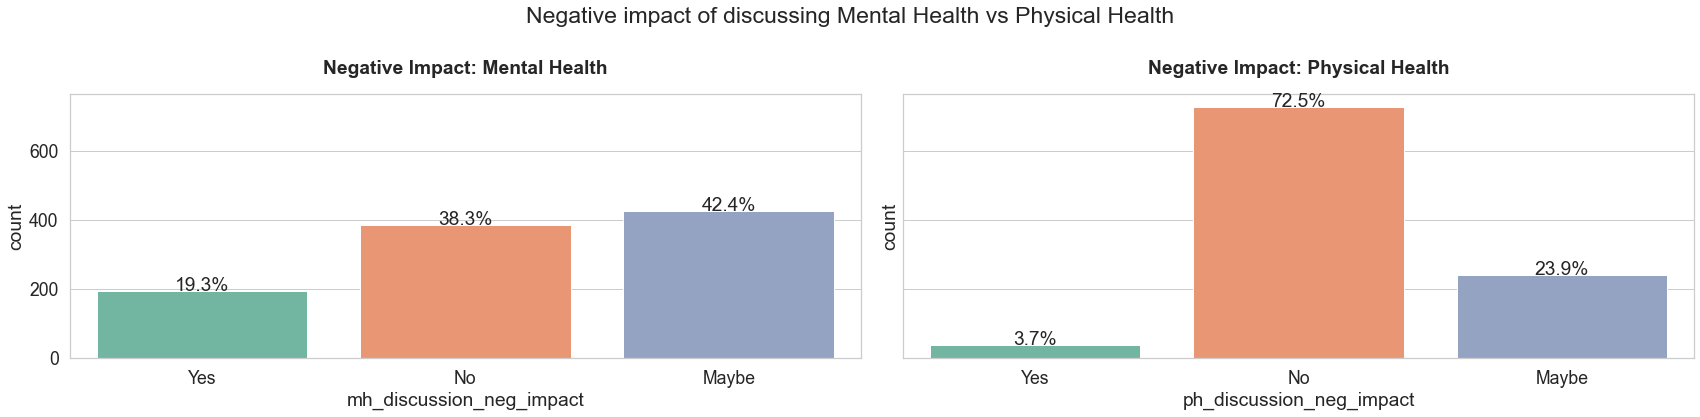

In [402]:
fig, ax = plt.subplots(1, 2, figsize=(24, 6),sharey=True)
fig.suptitle('Negative impact of discussing Mental Health vs Physical Health')
ax[0].set_title('Negative Impact: Mental Health',pad=20,fontweight="bold")
ax[1].set_title('Negative Impact: Physical Health',pad=20,fontweight="bold")

sns.countplot(ax=ax[0],data=df, x="mh_discussion_neg_impact", order=["Yes","No","Maybe"])
sns.countplot(ax=ax[1],data=df, x="ph_discussion_neg_impact", order=["Yes","No","Maybe"])

total = float(len(df))
for p in ax[0].patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax[0].annotate(percentage, (x, y),ha='center', va='baseline')

for p in ax[1].patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax[1].annotate(percentage, (x, y),ha='center', va='baseline')

fig.tight_layout()
plt.show()

The employees believe that physical health leaves have less impact on their careers/jobs than mental health leaves.

## Diagnosed Mental Health Disorders vs Currenlty Dealing per Age

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


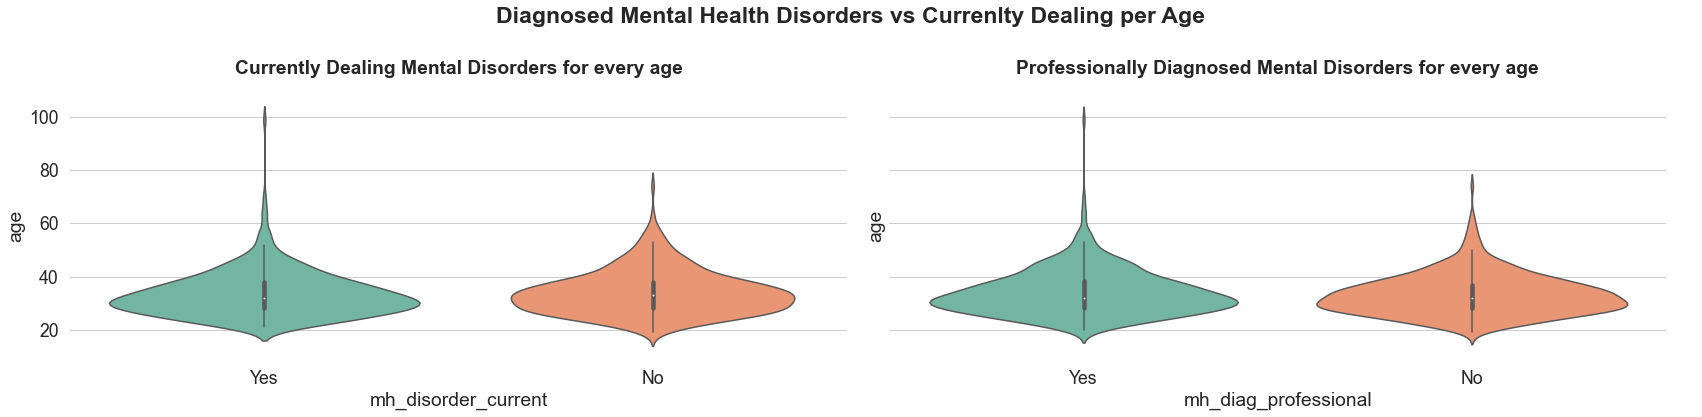

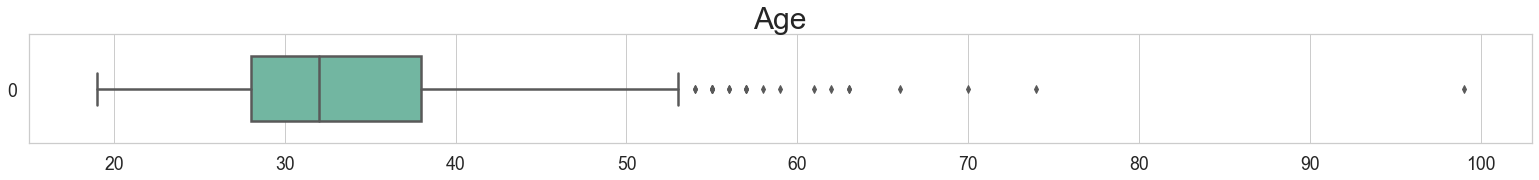

In [403]:
fig, ax = plt.subplots(1, 2, figsize=(24, 6),sharey=True)
fig.suptitle('Diagnosed Mental Health Disorders vs Currenlty Dealing per Age',fontweight="bold")
ax[1].set_title('Professionally Diagnosed Mental Disorders for every age',pad=20,fontweight="bold")
ax[0].set_title('Currently Dealing Mental Disorders for every age',pad=20,fontweight="bold")


sns.violinplot(ax=ax[1], data=df, x="mh_diag_professional", y="age", palette="Set2",
                  order=["Yes","No"])
sns.violinplot(ax=ax[0], data=df, x="mh_disorder_current", y="age", palette="Set2",
                 order=["Yes","No"])

ax[1].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax[0].spines['left'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

ax[1].spines['left'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

fig.tight_layout()
plt.show()

plt.figure(figsize=(24,2))
sns.set_style("whitegrid")
ax = sns.boxplot(data=df.age, palette='Set2',orient='h',linewidth=2.5,width=.6 )
ax.set_title('Age', fontsize=30)
plt.show()

## Mental Health Disorder currently vs Professionally Diagnosed per Leadership flag

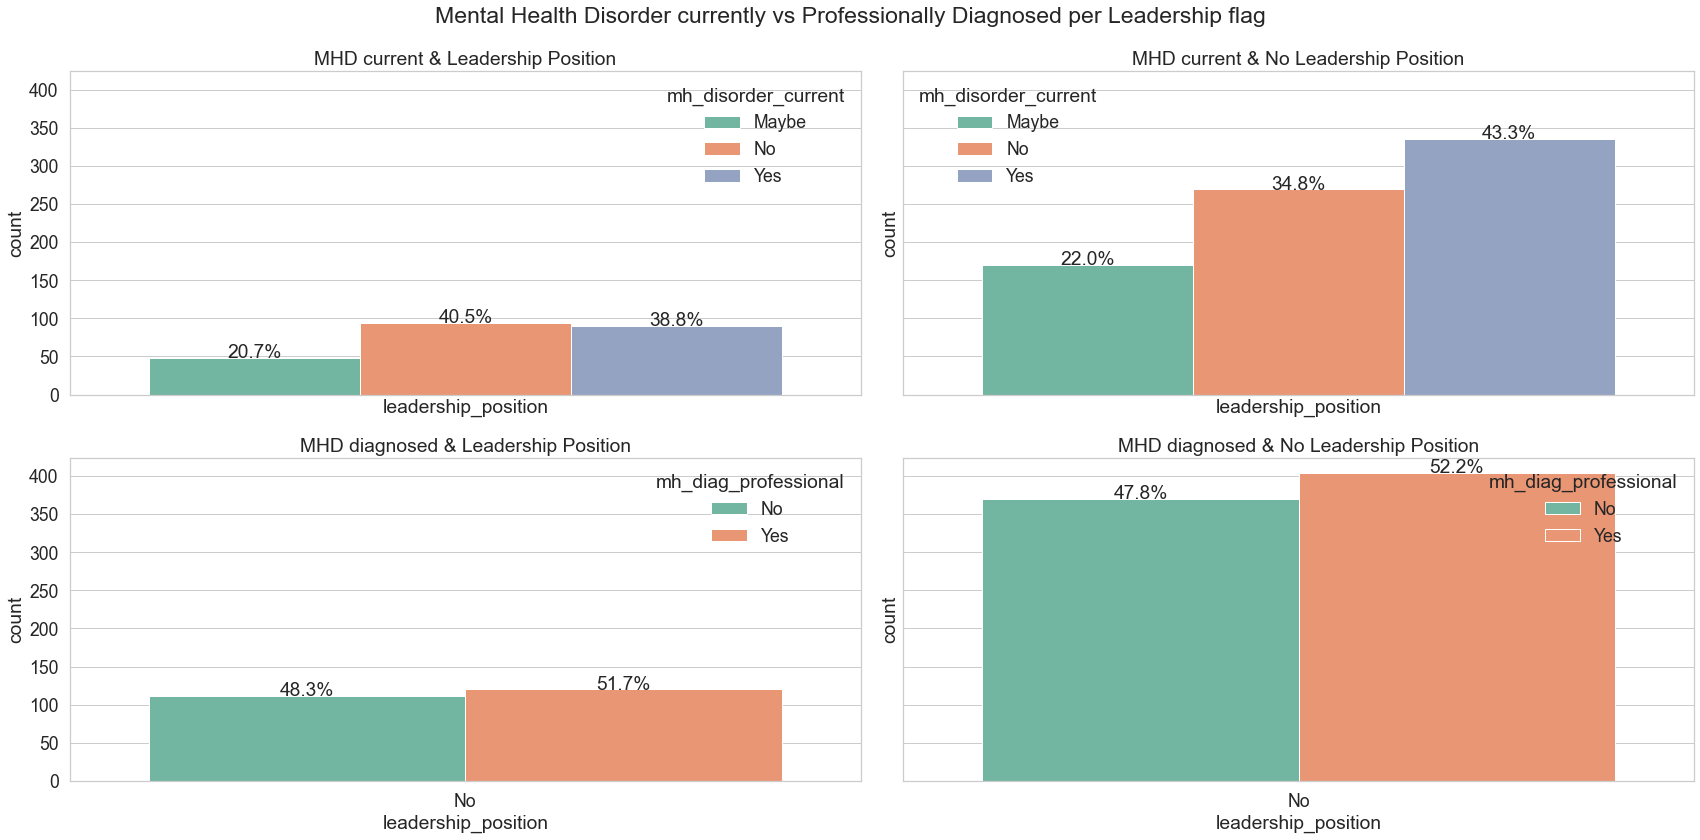

In [404]:
fig, ax = plt.subplots(2, 2, figsize=(24, 12),sharey=True, sharex=True)
fig.suptitle('Mental Health Disorder currently vs Professionally Diagnosed per Leadership flag')

ax[0,0].set_title('MHD current & Leadership Position')
ax[0,1].set_title('MHD current & No Leadership Position')
ax[1,0].set_title('MHD diagnosed & Leadership Position')
ax[1,1].set_title('MHD diagnosed & No Leadership Position')

sns.countplot(ax=ax[0,0], data=df, x=df.leadership_position[df["leadership_position"]=="Yes"], hue="mh_disorder_current")
sns.countplot(ax=ax[0,1], data=df, x=df.leadership_position[df["leadership_position"]=="No"], hue="mh_disorder_current")
sns.countplot(ax=ax[1,0], data=df, x=df.leadership_position[df["leadership_position"]=="Yes"], hue="mh_diag_professional")
sns.countplot(ax=ax[1,1], data=df, x=df.leadership_position[df["leadership_position"]=="No"], hue="mh_diag_professional")

total_leadership_position = len(df[df.leadership_position == "Yes"])
total_no_leadership_position = len(df[df.leadership_position == "No"])

for p in ax[0,0].patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total_leadership_position)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax[0,0].annotate(percentage, (x, y),ha='center', va='baseline')

for p in ax[0,1].patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total_no_leadership_position)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax[0,1].annotate(percentage, (x, y),ha='center', va='baseline')

for p in ax[1,0].patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total_leadership_position)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax[1,0].annotate(percentage, (x, y),ha='center', va='baseline')

for p in ax[1,1].patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total_no_leadership_position)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax[1,1].annotate(percentage, (x, y),ha='center', va='baseline')

fig.tight_layout()
plt.show()

30% of all surveytakers have a leadership position in their respective jobs. According to the survey, employees who function as leaders have a 6% higher occurance of having a mental health disorder.

# Encode features

**Target Variable:** \
`mh_disorder_current` = "Do you currently have a mental health disorder?" 

In [405]:
list_nominal_columns = [
    "tech_comp_flag", "tech_role_flag", "mh_coverage_awareness_flag", "mh_employer_discussion_flag", 
    "mh_resources_provided_flag","mh_anonimity_flag", "mh_discussion_neg_impact", 
    "ph_discussion_neg_impact", "mh_discussion_coworkers", "mh_discussion_supervisor",
    "mh_versus_ph_employer", "mh_consequence_coworkers", "prev_employers_flag", 
    "future_employers_ph_specification", "future_employers_mh_specification", "mh_family_history", 
    "mh_disorder_past", "mh_disorder_current", "mh_diag_professional",
    "country_live", "country_work", "leadership_position",
]

list_ordinal_columns = [
    "company_size", "mh_coverage_flag", "mh_sick_leave", "prev_employers_mh_benefits_awareness", 
    "prev_employers_mh_discussion", "prev_employers_mh_resources", "prev_employers_mh_anonimity",
    "prev_employers_mh_discuss_neg_consequences", "prev_employers_ph_discuss_neg_consequences", 
    "prev_employers_mh_discussion_cowork", "mh_hurt_on_career", "mh_neg_view_coworkers", 
    "mh_sharing_friends/fam_flag", "mh_bad_response_workplace", "mh_effective_treat_impact_on_work", 
    "mh_not_effective_treat_impact_on_work", "remote_flag"
]

In [406]:
# from sklearn.preprocessing import OrdinalEncoder

# Ordinal = OrdinalEncoder()
# encoded_array = Ordinal.fit_transform(df.drop(['age'], axis=1))
# encoded_df = pd.DataFrame(encoded_array, columns = df.columns.drop(['age']))
# encoded_df['age'] = df.age.tolist()

In [407]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.compose import make_column_transformer

# Encode nominal values into nominal df
encoded_df_nominal = df.copy().loc[:,list_nominal_columns]
transformer_nominal = make_column_transformer((OneHotEncoder(drop="first"), encoded_df_nominal.columns),verbose_feature_names_out=False)
transformed_nominal = transformer_nominal.fit_transform(encoded_df_nominal)
transformed_df_nominal = pd.DataFrame(transformed_nominal, columns=transformer_nominal.get_feature_names_out())


# Encode ordinal values into ordinal df
encoded_df_ordinal = df.copy().loc[:,list_ordinal_columns]
transformer_ordinal = make_column_transformer( (OrdinalEncoder(), encoded_df_ordinal.columns), verbose_feature_names_out=False)
transformed_ordinal = transformer_ordinal.fit_transform(encoded_df_ordinal)

# transformer object must be converted to array before converting into dataframe
array_ordinal = np.array(transformed_ordinal)
transformed_df_ordinal = pd.DataFrame(array_ordinal, columns=list_ordinal_columns)

# concat new dataframes
encoded_df = pd.concat([transformed_df_nominal,transformed_df_ordinal], axis=1)

# Add only integer column from original df `age`
encoded_df["age"] =  df.age.tolist()

# Feature Selection

#### Correlation

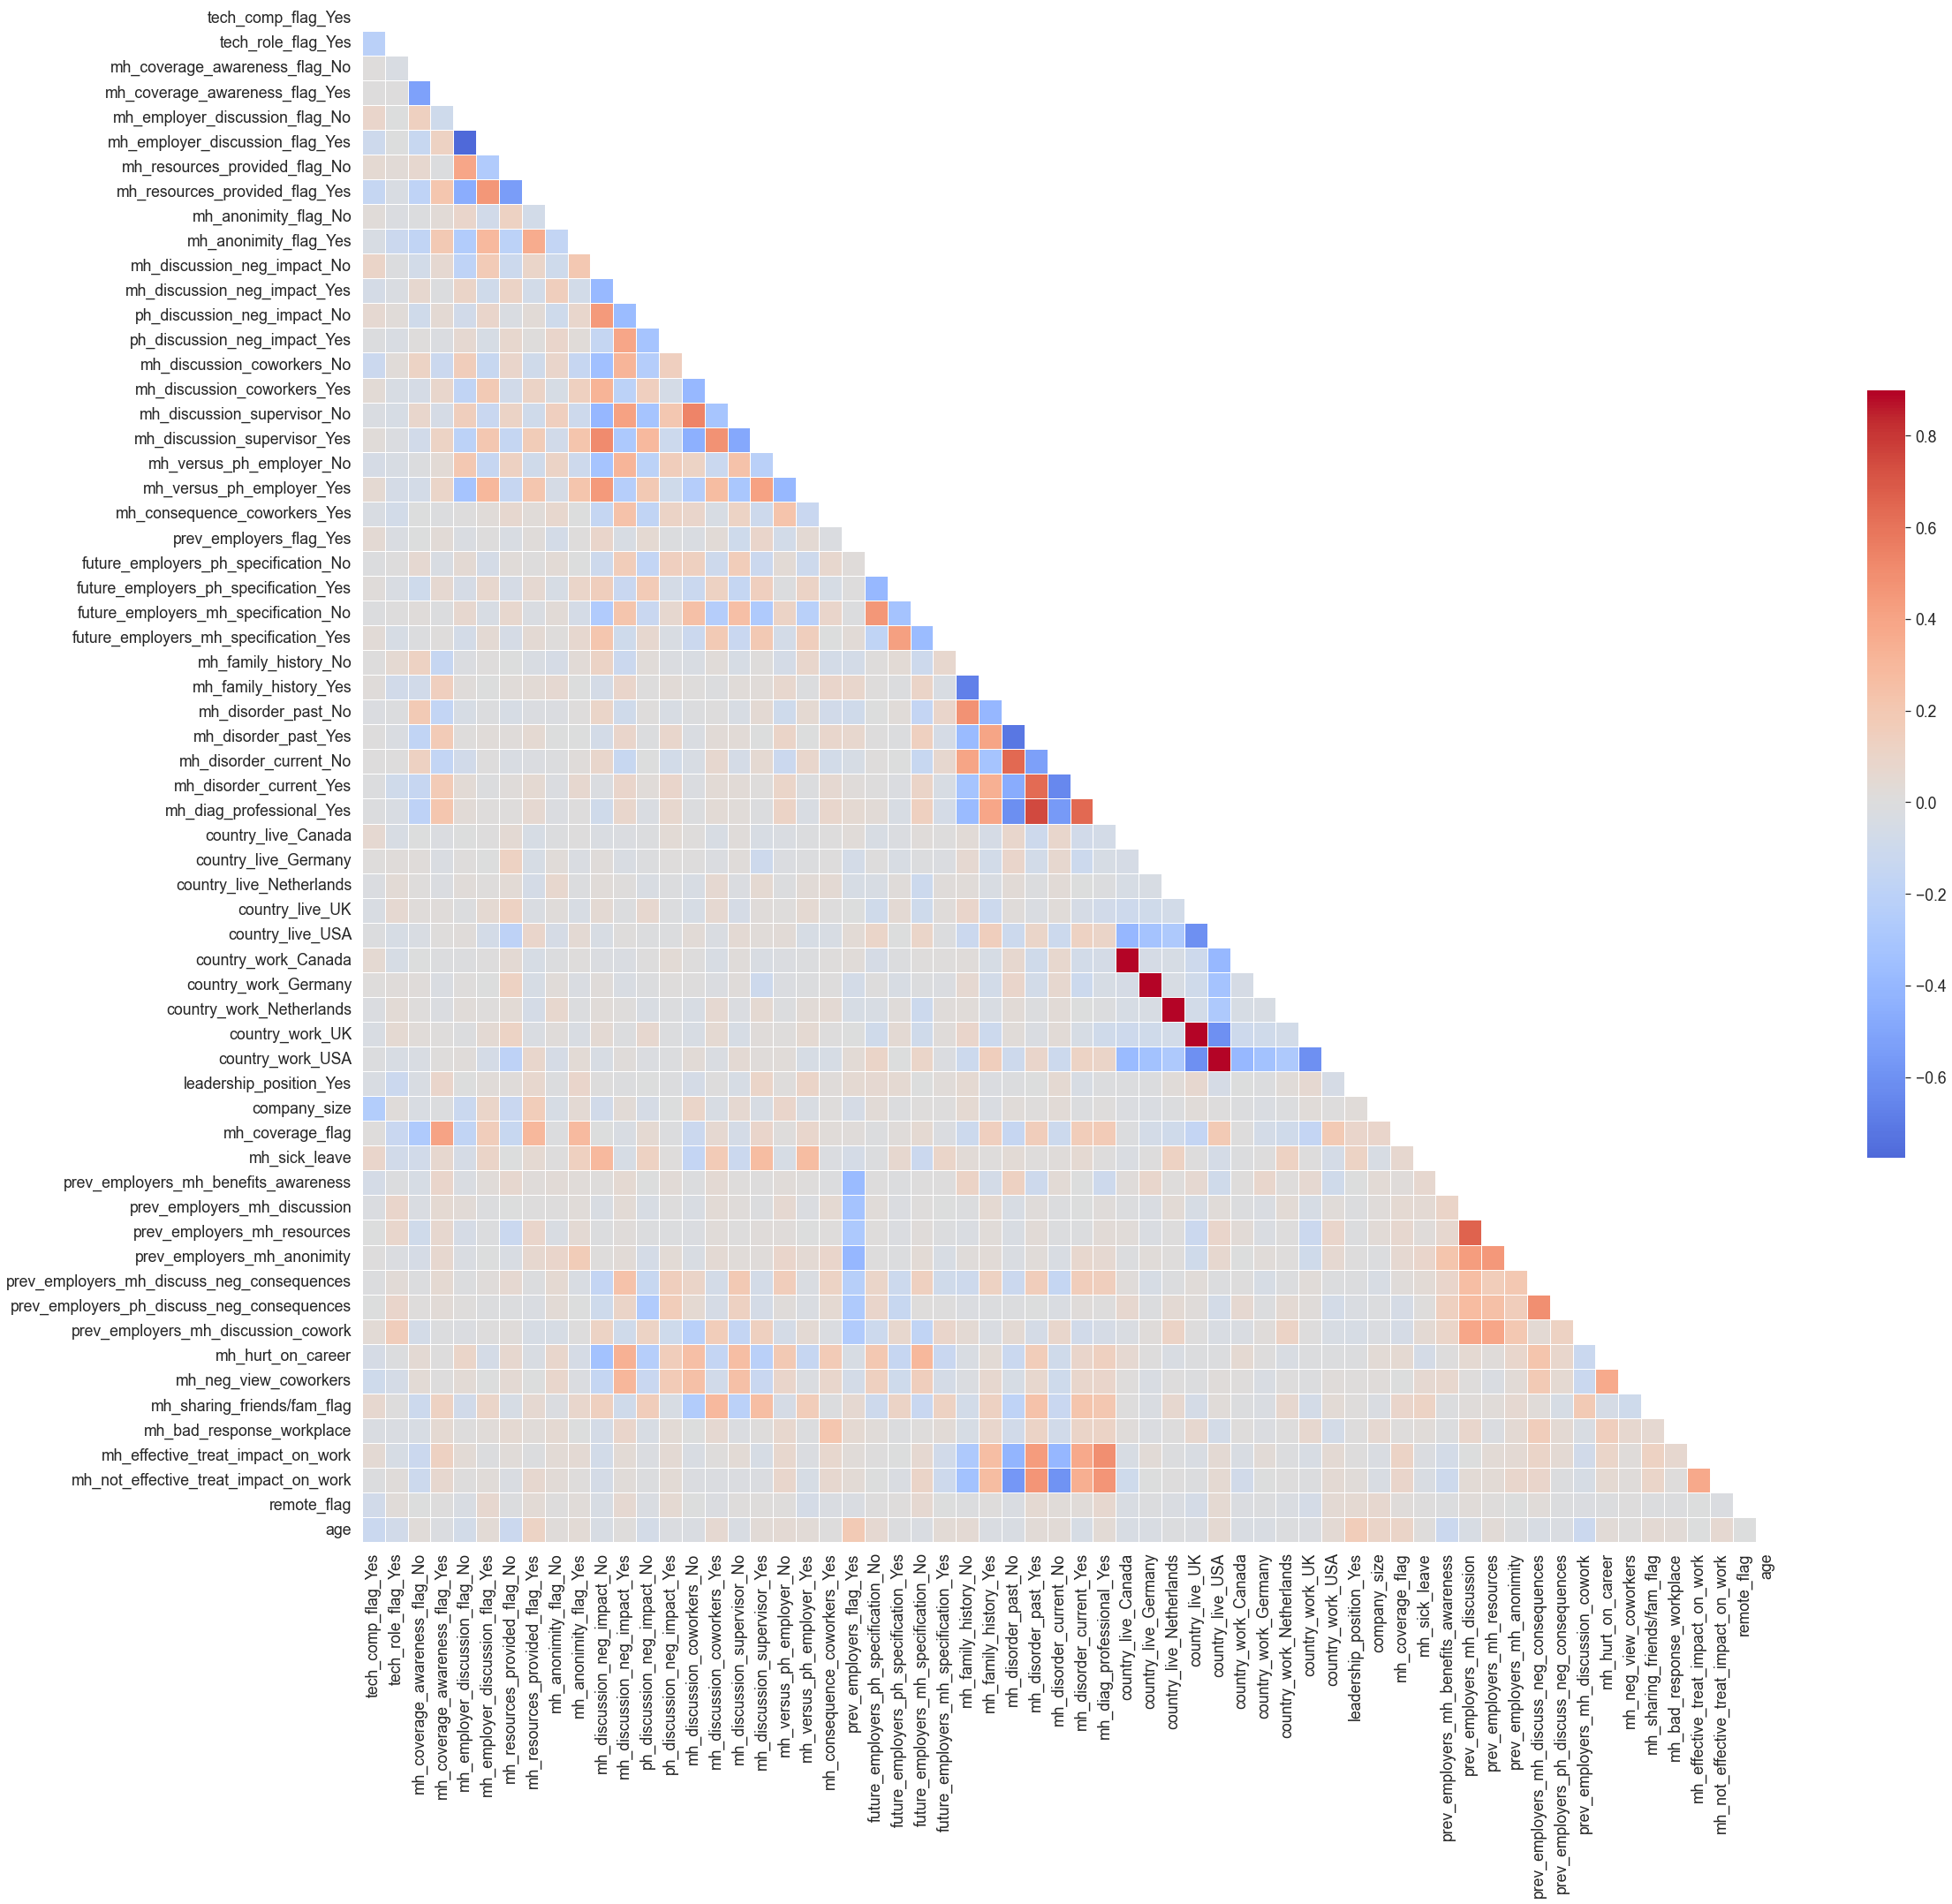

In [408]:
corr = encoded_df.corr(method ='spearman')
mask_1 = np.zeros_like(corr, dtype=bool)
mask_1[np.triu_indices_from(mask_1)] = True
fig, ax = plt.subplots(figsize=(32, 32))
sns.color_palette("coolwarm", as_cmap=True)
sns.heatmap(corr, mask=mask_1, cmap="coolwarm", vmax=.9, center=0, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [409]:
# Now we will look at the correlation between the target variable with all other variables.

correlations = encoded_df.corr().unstack().sort_values(ascending=False) # Building correlation matrix
correlations = pd.DataFrame(correlations).reset_index() # Converting to dataframe
correlations.columns = ['X', 'y', 'correlation'] # Labeling the columns for easier processing
correlations.query("X == 'mh_diag_professional_Yes' & y != 'mh_diag_professional_Yes'").nlargest(10,columns="correlation") # Filtering by variable treatment

X                                           y  \
72   mh_diag_professional_Yes                        mh_disorder_past_Yes   
74   mh_diag_professional_Yes                     mh_disorder_current_Yes   
84   mh_diag_professional_Yes           mh_effective_treat_impact_on_work   
127  mh_diag_professional_Yes                       mh_family_history_Yes   
136  mh_diag_professional_Yes       mh_not_effective_treat_impact_on_work   
226  mh_diag_professional_Yes              mh_coverage_awareness_flag_Yes   
267  mh_diag_professional_Yes                 mh_sharing_friends/fam_flag   
299  mh_diag_professional_Yes                            mh_coverage_flag   
338  mh_diag_professional_Yes  prev_employers_mh_discuss_neg_consequences   
383  mh_diag_professional_Yes                   mh_bad_response_workplace   

     correlation  
72      0.747051  
74      0.643037  
84      0.525521  
127     0.389019  
136     0.357031  
226     0.218603  
267     0.195745  
299     0.174540  
338     0.155421  
383     0.140222

#### ANOVA

In [410]:
from sklearn.feature_selection import SelectKBest  
from sklearn.feature_selection import f_classif

Y = encoded_df.mh_diag_professional_Yes
X = encoded_df.drop(["mh_diag_professional_Yes"],axis=1)

selector = SelectKBest(score_func=f_classif, k=2)
X_new = selector.fit_transform(X, Y)

pd.DataFrame({'features': X.columns,'Scores': selector.scores_,'p-values': selector.pvalues_}).sort_values(by="Scores", ascending=False).nlargest(n=10, columns="Scores")

features       Scores       p-values
29                   mh_disorder_past_Yes  1267.933662  3.068900e-180
31                mh_disorder_current_Yes   707.840118  1.836184e-118
28                    mh_disorder_past_No   591.149148  4.784760e-103
30                 mh_disorder_current_No   457.920439   5.378955e-84
57      mh_effective_treat_impact_on_work   383.069931   1.645128e-72
27                  mh_family_history_Yes   179.035732   1.081441e-37
26                   mh_family_history_No   171.339329   2.917341e-36
58  mh_not_effective_treat_impact_on_work   146.678716   1.308362e-31
3          mh_coverage_awareness_flag_Yes    50.386414   2.385164e-12
55            mh_sharing_friends/fam_flag    40.002296   3.812729e-10

#### Mutual Information

In [411]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

y = encoded_df.mh_diag_professional_Yes   
X = encoded_df.drop(['mh_diag_professional_Yes'],axis=1)
selector = SelectKBest(score_func=mutual_info_classif, k=2)
X_new = selector.fit_transform(X, y)

pd.DataFrame({'features': X.columns.values,'Scores': selector.scores_}).sort_values(by="Scores").nlargest(15,columns="Scores")

features    Scores
57           mh_effective_treat_impact_on_work  0.313750
29                        mh_disorder_past_Yes  0.308669
58       mh_not_effective_treat_impact_on_work  0.258195
31                     mh_disorder_current_Yes  0.223539
28                         mh_disorder_past_No  0.205425
30                      mh_disorder_current_No  0.175707
26                        mh_family_history_No  0.096185
27                       mh_family_history_Yes  0.065186
46        prev_employers_mh_benefits_awareness  0.064258
53                           mh_hurt_on_career  0.041178
56                   mh_bad_response_workplace  0.040255
11                mh_discussion_neg_impact_Yes  0.036660
50  prev_employers_mh_discuss_neg_consequences  0.032792
55                 mh_sharing_friends/fam_flag  0.031355
6                mh_resources_provided_flag_No  0.031179

#### Chi Square Test

In [412]:
from sklearn.feature_selection import SelectKBest, chi2

y = encoded_df.mh_diag_professional_Yes
X = encoded_df.drop(['mh_diag_professional_Yes'],axis=1)

selector = SelectKBest(chi2, k=8)
selector.fit(X,y)
X_new = selector.transform(X)

chi_square_test_result = pd.DataFrame({
    'features': X.columns.values,
     'Scores': selector.scores_,
     'p-values': selector.pvalues_
     }).sort_values(by="Scores").nlargest(8,columns="Scores")
chi_square_test_result

features      Scores      p-values
29                   mh_disorder_past_Yes  261.742188  7.157569e-59
28                    mh_disorder_past_No  257.190689  7.028965e-58
57      mh_effective_treat_impact_on_work  250.904383  1.649216e-56
31                mh_disorder_current_Yes  240.241541  3.483685e-54
30                 mh_disorder_current_No  201.408253  1.029259e-45
26                   mh_family_history_No   99.129452  2.365244e-23
58  mh_not_effective_treat_impact_on_work   78.603080  7.593094e-19
27                  mh_family_history_Yes   77.786633  1.147944e-18

## Selected Features

In [413]:
selected_features = chi_square_test_result.features.to_list()
selected_features.append("mh_diag_professional_Yes")
selected_features_df = encoded_df[selected_features]
selected_features_df.head()

mh_disorder_past_Yes  mh_disorder_past_No  \
0                   1.0                  0.0   
1                   1.0                  0.0   
2                   0.0                  0.0   
3                   1.0                  0.0   
4                   0.0                  1.0   

   mh_effective_treat_impact_on_work  mh_disorder_current_Yes  \
0                                1.0                      0.0   
1                                3.0                      1.0   
2                                1.0                      0.0   
3                                4.0                      1.0   
4                                1.0                      1.0   

   mh_disorder_current_No  mh_family_history_No  \
0                     1.0                   1.0   
1                     0.0                   0.0   
2                     1.0                   1.0   
3                     0.0                   0.0   
4                     0.0                   1.0   

   mh_not_effective_treat_impact_on_work  mh_family_history_Yes  \
0                                    1.0                    0.0   
1                                    4.0                    1.0   
2                                    1.0                    0.0   
3                                    4.0                    1.0   
4                                    2.0                    0.0   

   mh_diag_professional_Yes  
0                       1.0  
1                       1.0  
2                       0.0  
3                       1.0  
4                       0.0

# Principal Component Analysis

## Normalization

In [ ]:
# Standartize values
Scaler = StandardScaler()
X_std = Scaler.fit_transform(selected_features_df)

## Number of Principle Components

'The described cumulative variance for a 3 Principle Component is: 74.0191%'

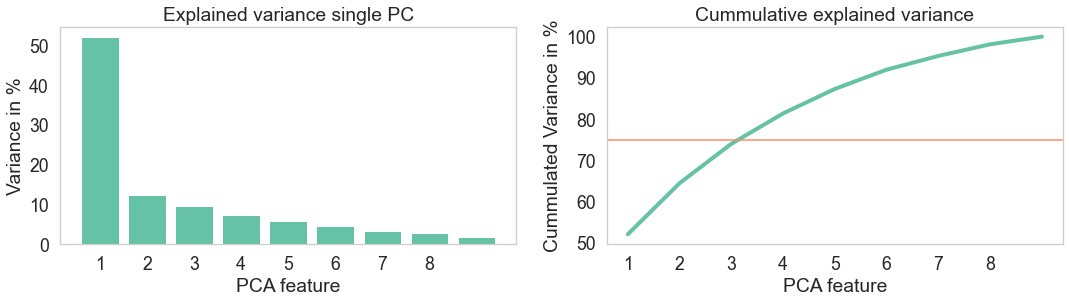

In [437]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Perform PCA for many dimensions
pca = PCA()
pca.fit(X_std)

# Calculate explained variance and cummulated variance
var_exp = pca.explained_variance_ratio_ * 100
cum_var_exp = np.cumsum(var_exp)
display(f"The described cumulative variance for a 3 Principle Component is: {round(cum_var_exp[2],4)}%")

# Plot single ratio for explained variance per PC and cummulative explained variance
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
pal = sns.color_palette('Set2')
pal.as_hex()

# Left plot for single PC
ax[0].bar(range(pca.n_components_), var_exp)
ax[0].set_title("Explained variance single PC")

# Right plot for cummulated PC
ax[1] = sns.lineplot(x=range(0,len(pca.explained_variance_ratio_)), y=pca.explained_variance_ratio_.cumsum()*100, 
    palette="Set2", linewidth=4)
ax[1].axhline(y=75, color=pal[1], linestyle='-')
ax[1].set_title("Cummulative explained variance")

# For loop for similar naming convetion and style
for n in ax:
    n.set_xlabel('PCA feature')
    if n == ax[0]:
        n.set_ylabel('Variance in %')
    elif n == ax[1]:
        n.set_ylabel('Cummulated Variance in %')
    n.set_xticks(ticks=[0,1,2,3,4,5,6,7],labels=[1,2,3,4,5,6,7,8])
    n.grid(visible=None)
plt.show()

## PCA with 3 components

In [517]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(X_std) 
pca_scores = pca.transform(X_std) 

## Heatmap

<AxesSubplot:>

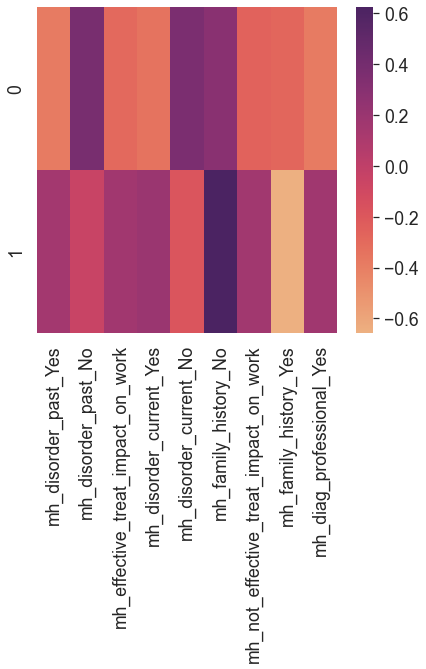

In [508]:
df_comp = pd.DataFrame(pca.components_,columns=selected_features_df.columns)
plt.figure(figsize=(6,6))
sns.heatmap(df_comp,cmap='flare')

# Multi Dimensional Scaling

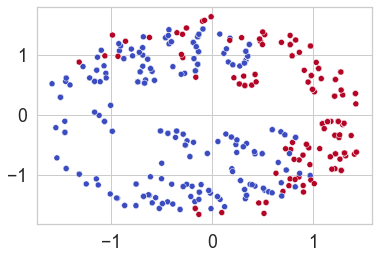

In [ ]:
from sklearn.manifold import MDS
from sklearn.preprocessing import MinMaxScaler

y= encoded_df["mh_disorder_current_Yes"]
X_mds = encoded_df
X_scaled = MinMaxScaler().fit_transform(X_mds)
mds = MDS(2,random_state=0)
X_2d = mds.fit_transform(X_scaled)

sns.scatterplot(x=X_2d[:,0], y=X_2d[:,1], c=y, cmap="coolwarm")
plt.show()

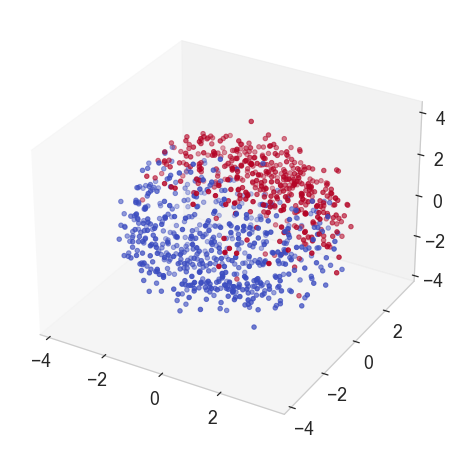

In [ ]:
from sklearn.manifold import MDS
from sklearn.preprocessing import MinMaxScaler

y= encoded_df["mh_disorder_current_Yes"]
X_mds = encoded_df
X_scaled = MinMaxScaler().fit_transform(X_mds)
mds = MDS(3,random_state=0)
X_3d = mds.fit_transform(X_scaled)

fig = plt.figure(figsize=(64,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=y, cmap="coolwarm")
ax.grid(False)

plt.show()

# K-Means Clustering

## Elbow Method

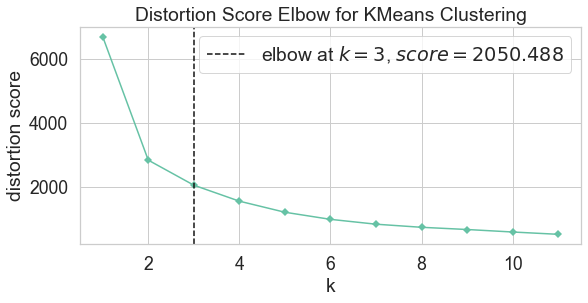

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [456]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

plt.figure(figsize=(8,4))

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12), timings=False)

visualizer.fit(pca_scores)   # Fit the data to the visualizer
visualizer.show()            # Finalize and render the figure

# Clustering and Analysis

In [518]:
kmeans_pca = KMeans(n_clusters = 3)
kmeans_pca.fit(pca_scores)

KMeans(n_clusters=3)

In [519]:
df_segm_pca_kmeans = pd.concat([df.reset_index(drop=True),pd.DataFrame(pca_scores)],axis=1)
df_segm_pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']

# The Last column we add contains the pca k-means clustering labels.
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [520]:
df_segm_pca_kmeans.head()

company_size tech_comp_flag tech_role_flag                 mh_coverage_flag  \
0       26-100            Yes            Yes  Not eligible for coverage / N/A   
1         6-25            Yes            Yes                               No   
2         6-25            Yes            Yes                               No   
3         6-25             No            Yes                              Yes   
4        >1000            Yes            Yes                              Yes   

  mh_coverage_awareness_flag mh_employer_discussion_flag  \
0                        Yes                          No   
1                        Yes                         Yes   
2                        Yes                          No   
3                        Yes                          No   
4              I am not sure                          No   

  mh_resources_provided_flag mh_anonimity_flag               mh_sick_leave  \
0                         No      I don't know                   Very easy   
1                        Yes               Yes               Somewhat easy   
2                         No      I don't know  Neither easy nor difficult   
3                         No                No  Neither easy nor difficult   
4                        Yes               Yes               Somewhat easy   

  mh_discussion_neg_impact ph_discussion_neg_impact mh_discussion_coworkers  \
0                       No                       No                   Maybe   
1                       No                       No                   Maybe   
2                    Maybe                       No                   Maybe   
3                      Yes                    Maybe                   Maybe   
4                      Yes                      Yes                   Maybe   

  mh_discussion_supervisor mh_versus_ph_employer mh_consequence_coworkers  \
0                      Yes          I don't know                       No   
1                      Yes                   Yes                       No   
2                    Maybe          I don't know                       No   
3                       No                    No                       No   
4                      Yes                    No                      Yes   

  prev_employers_flag prev_employers_mh_benefits  \
0                 Yes               No, none did   
1                 Yes          Yes, they all did   
2                 Yes               No, none did   
3                 Yes               I don't know   
4                 Yes               No, none did   

  prev_employers_mh_benefits_awareness prev_employers_mh_discussion  \
0            N/A (not currently aware)                 I don't know   
1                  I was aware of some                     None did   
2            N/A (not currently aware)                     None did   
3            N/A (not currently aware)                     Some did   
4      Yes, I was aware of all of them                     None did   

  prev_employers_mh_resources prev_employers_mh_anonimity  \
0                    None did                I don't know   
1                    Some did                 Yes, always   
2                    Some did                I don't know   
3                    None did                I don't know   
4                    None did                I don't know   

  prev_employers_mh_discuss_neg_consequences  \
0                               Some of them   
1                               None of them   
2                               I don't know   
3                               Some of them   
4                           Yes, all of them   

  prev_employers_ph_discuss_neg_consequences  \
0                               None of them   
1                               None of them   
2                               Some of them   
3                               Some of them   
4                               Some of them   

    prev_employers_mh_discussion_cowork  \
0         Some of m

In [521]:
df_segm_pca_kmeans['Segment'] = df_segm_pca_kmeans['Segment K-means PCA'].map(
    {0:'First',
    1: 'Second',
    })

In [522]:
df_segm_pca_kmeans.head()

company_size tech_comp_flag tech_role_flag                 mh_coverage_flag  \
0       26-100            Yes            Yes  Not eligible for coverage / N/A   
1         6-25            Yes            Yes                               No   
2         6-25            Yes            Yes                               No   
3         6-25             No            Yes                              Yes   
4        >1000            Yes            Yes                              Yes   

  mh_coverage_awareness_flag mh_employer_discussion_flag  \
0                        Yes                          No   
1                        Yes                         Yes   
2                        Yes                          No   
3                        Yes                          No   
4              I am not sure                          No   

  mh_resources_provided_flag mh_anonimity_flag               mh_sick_leave  \
0                         No      I don't know                   Very easy   
1                        Yes               Yes               Somewhat easy   
2                         No      I don't know  Neither easy nor difficult   
3                         No                No  Neither easy nor difficult   
4                        Yes               Yes               Somewhat easy   

  mh_discussion_neg_impact ph_discussion_neg_impact mh_discussion_coworkers  \
0                       No                       No                   Maybe   
1                       No                       No                   Maybe   
2                    Maybe                       No                   Maybe   
3                      Yes                    Maybe                   Maybe   
4                      Yes                      Yes                   Maybe   

  mh_discussion_supervisor mh_versus_ph_employer mh_consequence_coworkers  \
0                      Yes          I don't know                       No   
1                      Yes                   Yes                       No   
2                    Maybe          I don't know                       No   
3                       No                    No                       No   
4                      Yes                    No                      Yes   

  prev_employers_flag prev_employers_mh_benefits  \
0                 Yes               No, none did   
1                 Yes          Yes, they all did   
2                 Yes               No, none did   
3                 Yes               I don't know   
4                 Yes               No, none did   

  prev_employers_mh_benefits_awareness prev_employers_mh_discussion  \
0            N/A (not currently aware)                 I don't know   
1                  I was aware of some                     None did   
2            N/A (not currently aware)                     None did   
3            N/A (not currently aware)                     Some did   
4      Yes, I was aware of all of them                     None did   

  prev_employers_mh_resources prev_employers_mh_anonimity  \
0                    None did                I don't know   
1                    Some did                 Yes, always   
2                    Some did                I don't know   
3                    None did                I don't know   
4                    None did                I don't know   

  prev_employers_mh_discuss_neg_consequences  \
0                               Some of them   
1                               None of them   
2                               I don't know   
3                               Some of them   
4                           Yes, all of them   

  prev_employers_ph_discuss_neg_consequences  \
0                               None of them   
1                               None of them   
2                               Some of them   
3                               Some of them   
4                               Some of them   

    prev_employers_mh_discussion_cowork  \
0         Some of m

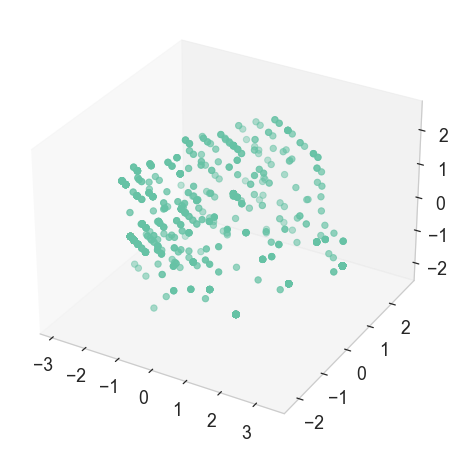

In [528]:
from matplotlib.colors import ListedColormap

Xax = df_segm_pca_kmeans['Component 1']
Yax = df_segm_pca_kmeans['Component 2']
Zax = df_segm_pca_kmeans['Component 3']

fig = plt.figure(figsize=(32,8))
ax = fig.add_subplot(projection='3d')
cmap = ListedColormap(sns.color_palette("Set2").as_hex())
ax.scatter3D(Xax, Yax, Zax, s=40)
ax.grid(False)
plt.show()

<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

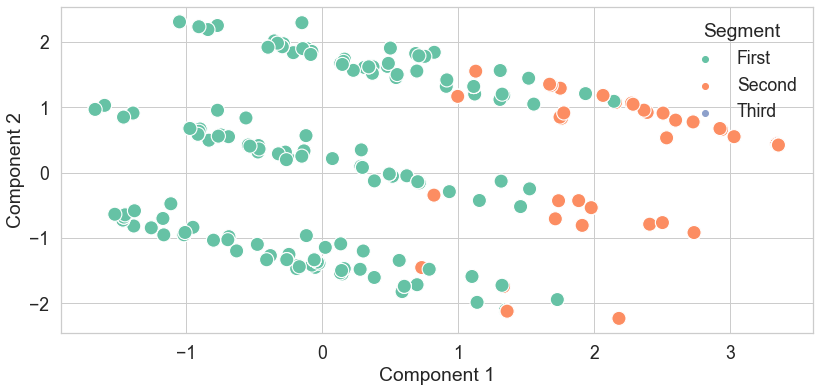

In [524]:
x = df_segm_pca_kmeans['Component 1']
y = df_segm_pca_kmeans['Component 2']
fig = plt.figure(figsize=(12,6))
sns.scatterplot(data=df_segm_pca_kmeans, x=x,y=y, hue="Segment", palette="Set2", s=200,hue_order=["First", "Second", "Third"])